<a href="https://colab.research.google.com/github/JasmineNag/Cardiovascular-Risk-Prediction/blob/main/Final_ML_Submission_(Cardiovascular_Risk_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - CARDIOVASCULAR RISK PREDICTION



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

This project aimed to predict the likelihood of an individual suffering from cardiovascular diseases (CHD) in the next 10 years. The dataset contained information about various risk factors such as age, sex, smoking, hypertension, diabetes, and education level. 

Exploratory data analysis showed that males, smokers, hypertensive patients, and those with a history of stroke or diabetes were more prone to CHD. Additionally, age was positively correlated with CHD risk, with individuals above 65 years being more vulnerable.

Four classification models were implemented, including Logistic Regression, Random Forest, Naive Bayes, and XGBoost. The XGBoost model was chosen as the optimal model with the highest recall, precision, F1 score, accuracy, and AUC-ROC.

The XGBoost model correctly predicted 520 of class 0 (no CHD) and 510 of class 1 (CHD) patients, with 89 and 33 cases of false negatives and false positives, respectively. Age, sex, and pulse pressure were identified as the highest contributing features towards the predictions.

No overfitting was observed in any of the models, and hyperparameter tuning was performed using GridSearchCV to optimize the XGBoost model. 

Overall, this project provides insight into the risk factors associated with CHD and offers a predictive model that can help identify individuals at high risk for CHD.

# **GitHub Link -**

https://github.com/JasmineNag/Cardiovascular-Risk-Prediction.git

# **Problem Statement**


The Cardiovascular Risk Prediction dataset is derived from a long-term study of Framingham, Massachusetts residents and aims to predict the 10-year risk of developing coronary heart disease(CHD) based on 15 attributes, such as age, gender, smoking status, blood pressure, cholesterol levels, and diabetes status. With over 4000 records, the dataset provides valuable insights into potential risk factors for CHD, including demographic, behavioral, and medical factors. The ultimate goal is to develop accurate predictive models that can aid in the prevention and early detection of CHD, potentially improving public health outcomes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# Import Libraries
# For data visualisation
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

# For feature engineering ans selection 
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2  #feature selection for classification
from sklearn.metrics import recall_score    #to measure model performance

# Machine learning model selection and implementation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Importing classification metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score

# To create table
from prettytable import PrettyTable

# importing missingo library which helps us to visualize the missing values
import missingno as msno

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone Project 3/data_cardiovascular_risk.csv")

### Dataset First View

In [4]:
# Dataset First Look
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print("The Cardiovascular Risk prediction Dataset has " + str(df.shape[0]) + " rows and " + str(df.shape[1]) + " columns.")      
          #Using concatenation and str() function
          

The Cardiovascular Risk prediction Dataset has 3390 rows and 17 columns.


### Dataset Information

In [6]:
# Dataset Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()                                    #This code will print the number of duplicate values in the dataset. 
print("Number of duplicate values in the dataset: ", duplicate_count)   

Number of duplicate values in the dataset:  0


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
# 'df' is the DataFrame object
missing_values_count = df.isnull().sum()                                   #This code will print the number of missing values in each column of the dataset.
print("Number of missing values in the dataset:\n", missing_values_count)


Number of missing values in the dataset:
 id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


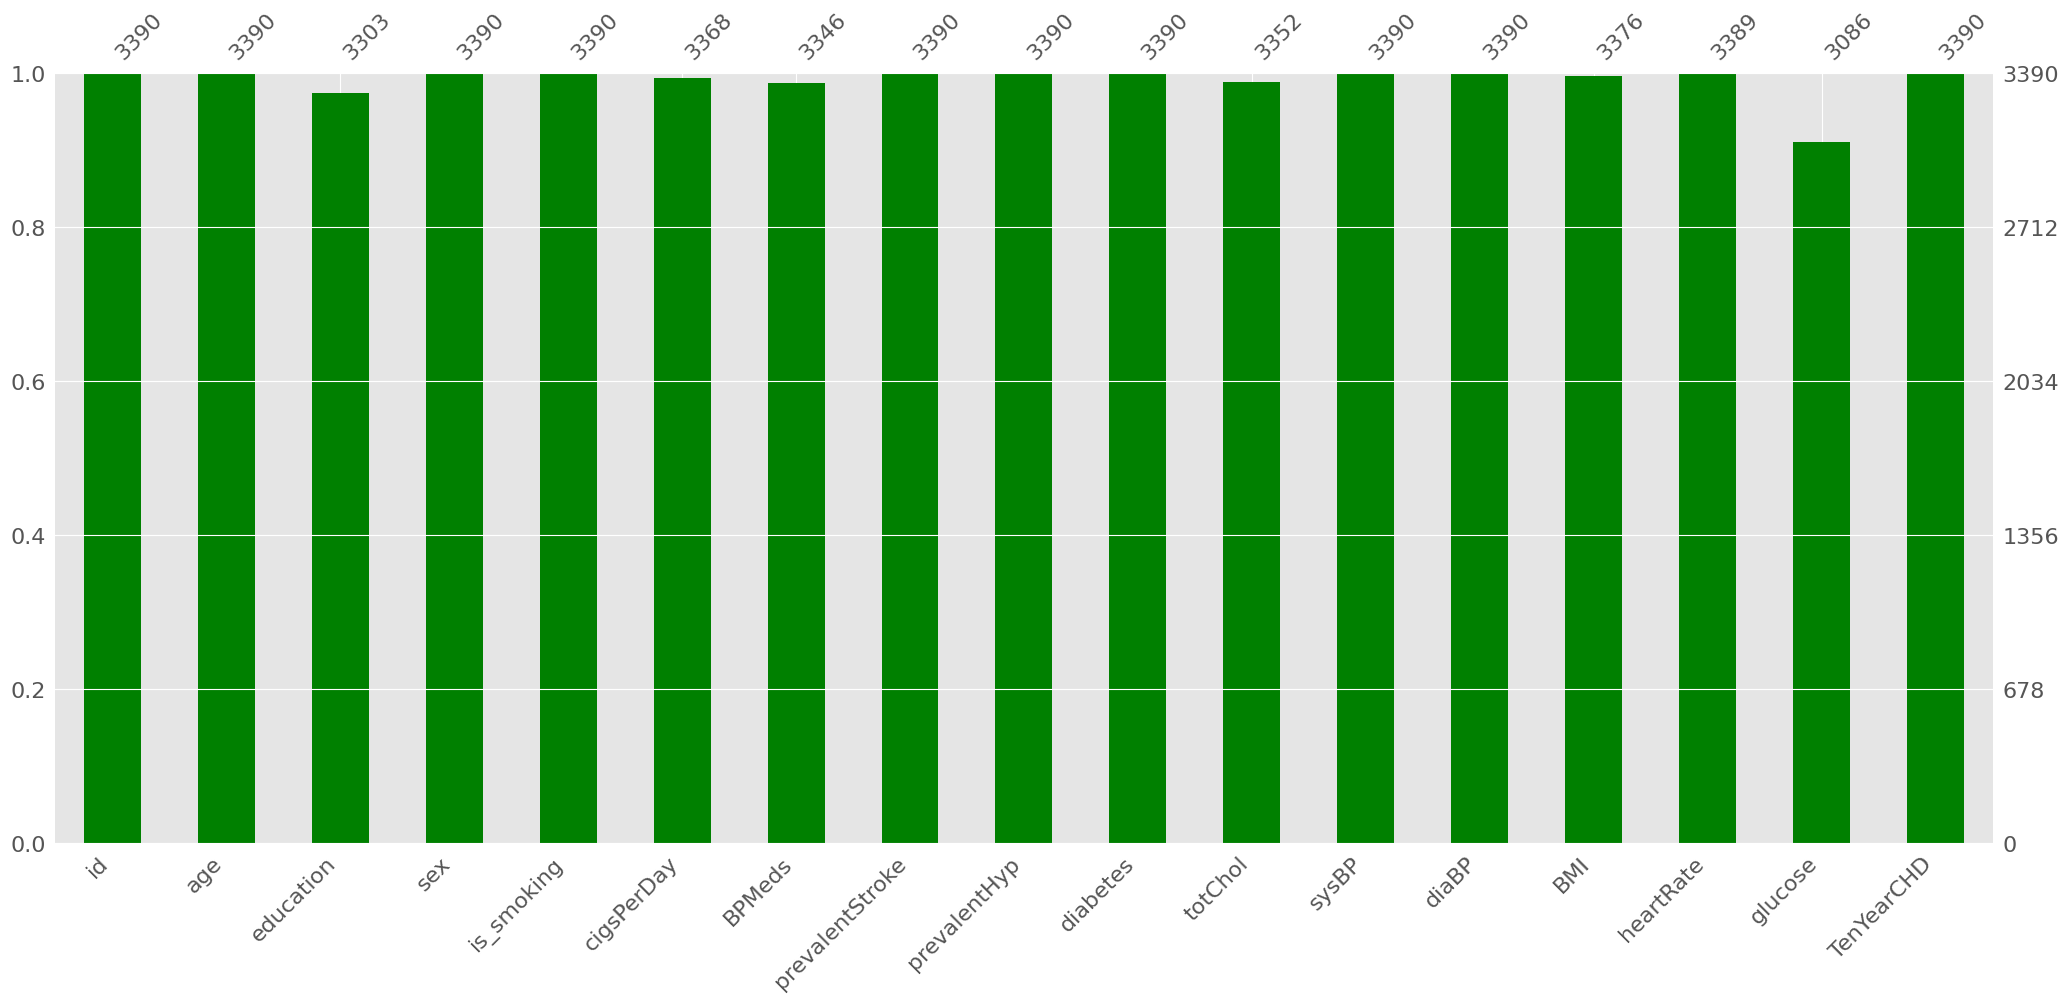

In [9]:
# Visualizing the missing values
msno.bar(df,color='g')
plt.show()

### What did you know about your dataset?



*  It contains 3390 rows and 17 columns.
*  Only two columns i.e sex and is_smoking are of Object datatype. Rest are of int and float datatypes.
*  There are no duplicate rows in our dataset.
*  The column "education" has 87 missing values, "cigsPerDay" has 22, "BPMeds" 
has 44, "totChol" has 38, "BMI" has 14, "heartRate" has 1, and "glucose" has 304 missing values.
*  The other columns, namely "id", "age", "sex", "is_smoking", "prevalentStroke", "prevalentHyp", "diabetes", "sysBP", "diaBP", and "TenYearCHD" have no missing values.











## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns  #This tells us that the column labels of the DataFrame are 'id', 'Age', and 'Gender', and that they are stored in a pandas Index object. 

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe() 
 #This code will print a summary of the dataset, including the count, mean, standard deviation, minimum, maximum, and percentiles for each numerical column.

id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

### Variables Description 

**id :** A unique identifier for each individual

**age:** Age of the individual in years

**education:** Level of education of the individual (categorical variable)

**sex:**is_smoking: Whether the individual is a smoker or not (binary variable)

**cigsPerDay:** Number of cigarettes smoked per day (continuous variable)

**BPMeds:** Whether the individual is on blood pressure medication or not (binary variable)

**prevalentStroke:**Whether the individual has had a stroke in the past (binary variable)

**prevalentHyp:** Whether the individual has hypertension (high blood pressure) or not (binary variable)

**diabetes:** Whether the individual has diabetes or not (binary variable)

**totChol:** Total cholesterol levels of the individual (continuous variable)

**sysBP:** Systolic blood pressure of the individual (continuous variable)

**diaBP:** Diastolic blood pressure of the individual (continuous variable)

**BMI:** Body Mass Index of the individual (continuous variable)

**heartRate:**Heart rate of the individual (continuous variable)

**glucose:** Blood glucose level of the individual (continuous variable)

**TenYearCHD:** The 10-year risk of developing coronary heart disease for the individual (binary variable)

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for i in df.columns.tolist():                    #This code will print the number of unique values for each column in the dataset.
  print("Unique values in ",i,"are",df[i].nunique(),".")

Unique values in  id are 3390 .
Unique values in  age are 39 .
Unique values in  education are 4 .
Unique values in  sex are 2 .
Unique values in  is_smoking are 2 .
Unique values in  cigsPerDay are 32 .
Unique values in  BPMeds are 2 .
Unique values in  prevalentStroke are 2 .
Unique values in  prevalentHyp are 2 .
Unique values in  diabetes are 2 .
Unique values in  totChol are 240 .
Unique values in  sysBP are 226 .
Unique values in  diaBP are 142 .
Unique values in  BMI are 1259 .
Unique values in  heartRate are 68 .
Unique values in  glucose are 132 .
Unique values in  TenYearCHD are 2 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In order to impute the null values with the various statistical value (Mean, Median, Mode) we have to check the following things:

1. Distribution of data

2. Outliers in the data

In [13]:
# Dropping the first id column 
df=df.drop(['id'] , axis = 1)
     

In [14]:
# storing the features that contains null values in a separate list
null_list= ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']

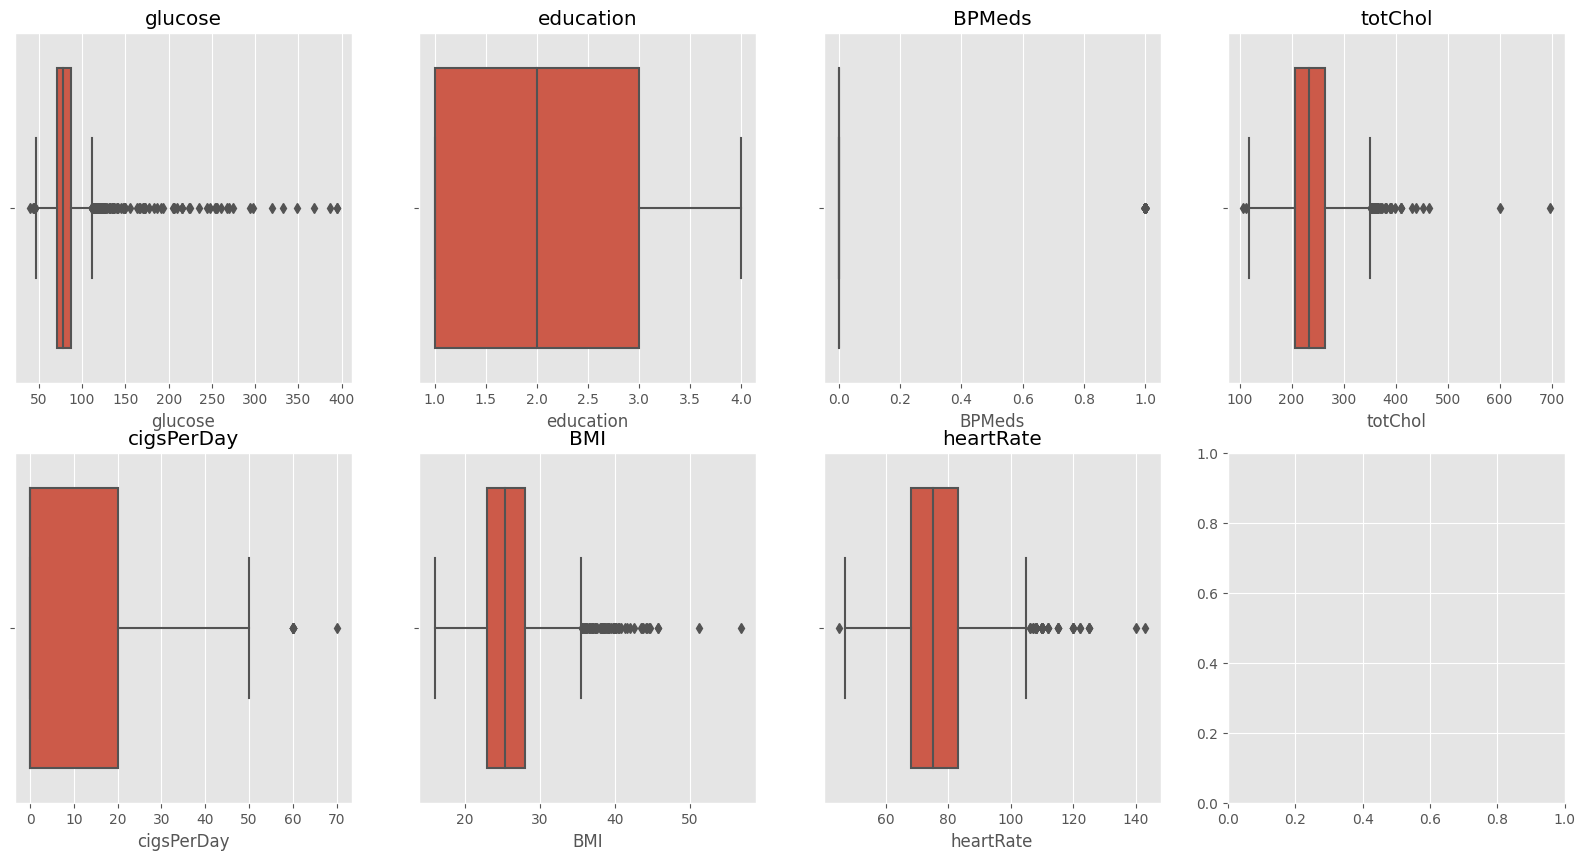

In [15]:
# Plotting the box plot and observe the outliers in the columns having null values
# Create figure with subplots
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Create box plots for columns with null values
for i, column in enumerate(null_list):
    sns.boxplot(x=df[column], ax=axs[i//4, i%4])
    axs[i//4, i%4].set_title(column)

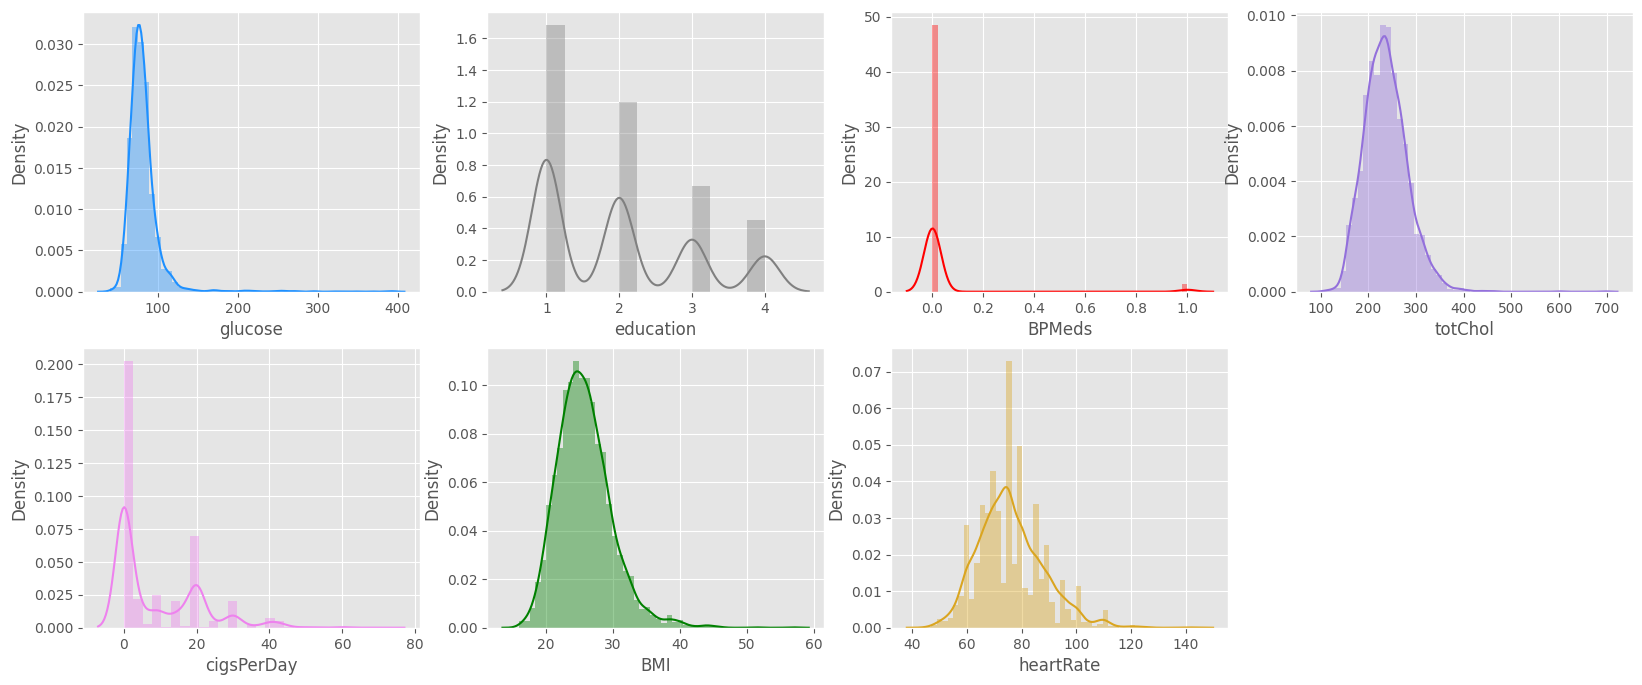

In [16]:
# Plotting the frequency distribution plot for checking the distribution of each feature that contains null values
plt.figure(figsize=(20,8))
colour= ['dodgerblue','grey','red','mediumpurple','violet','green','goldenrod','lime']
for i,j in zip(null_list, colour):
  ax= plt.subplot(2,4,null_list.index(i)+1)
  sns.distplot(df[i],color=j)
plt.show()

We know that:

Mean is used when we have normal distributed data and do not contain any outlier.
Median is used when the data is numerical, continous and contains extreme values (outliers).
Mode is used when the data is categorical in nature.
By checking the outliers and distribution of the data we are going to impute the null values of:

"glucose" -> Median

"education" -> Mode

"BPMeds" -> Mode

"totChol" -> Median

"cigsPerDay" -> Median

"BMI" -> Median

"heartRate" -> Median

In [17]:
# Filling up the NaN values of each feature
df['glucose'].fillna(df['glucose'].mean(), inplace=True)   #filled with the mean value of the column, computed using the mean() method.
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace=True)
df['totChol'].fillna(df['totChol'].median(), inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['heartRate'].fillna(df['heartRate'].median(), inplace=True)

In [18]:
df['cigsPerDay'].mean()

9.069477434679335

In [19]:
# Rechecking the null values in the dataset after imputing with different statistical values
df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### What all manipulations have you done and insights you found?



1.   We have replaced null values from glucose, totChol,BMI and heartRate withmedian as they are containing high amount of outliers. 
2.  Null values from categorical features like Education and BPmeds are replaced with mode.

1.  As CigsPerDay feature is having median value as zero and contains less number of outliers We have replaced null values within it with mean.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [20]:
# Separating the categorical and continous variable and storing them into different lists (excluding 'id')
categorical_variable=[]
continous_variable=[]

for i in df.columns:
  if i == 'id':
    pass
  elif df[i].nunique() <10:
    categorical_variable.append(i)
  elif df[i].nunique() >= 10:
    continous_variable.append(i)

In [21]:

# Checking the definded lists
print(categorical_variable)
print(continous_variable)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


**Univariate Analysis**

#### Chart - 1(Histogram of all variable)

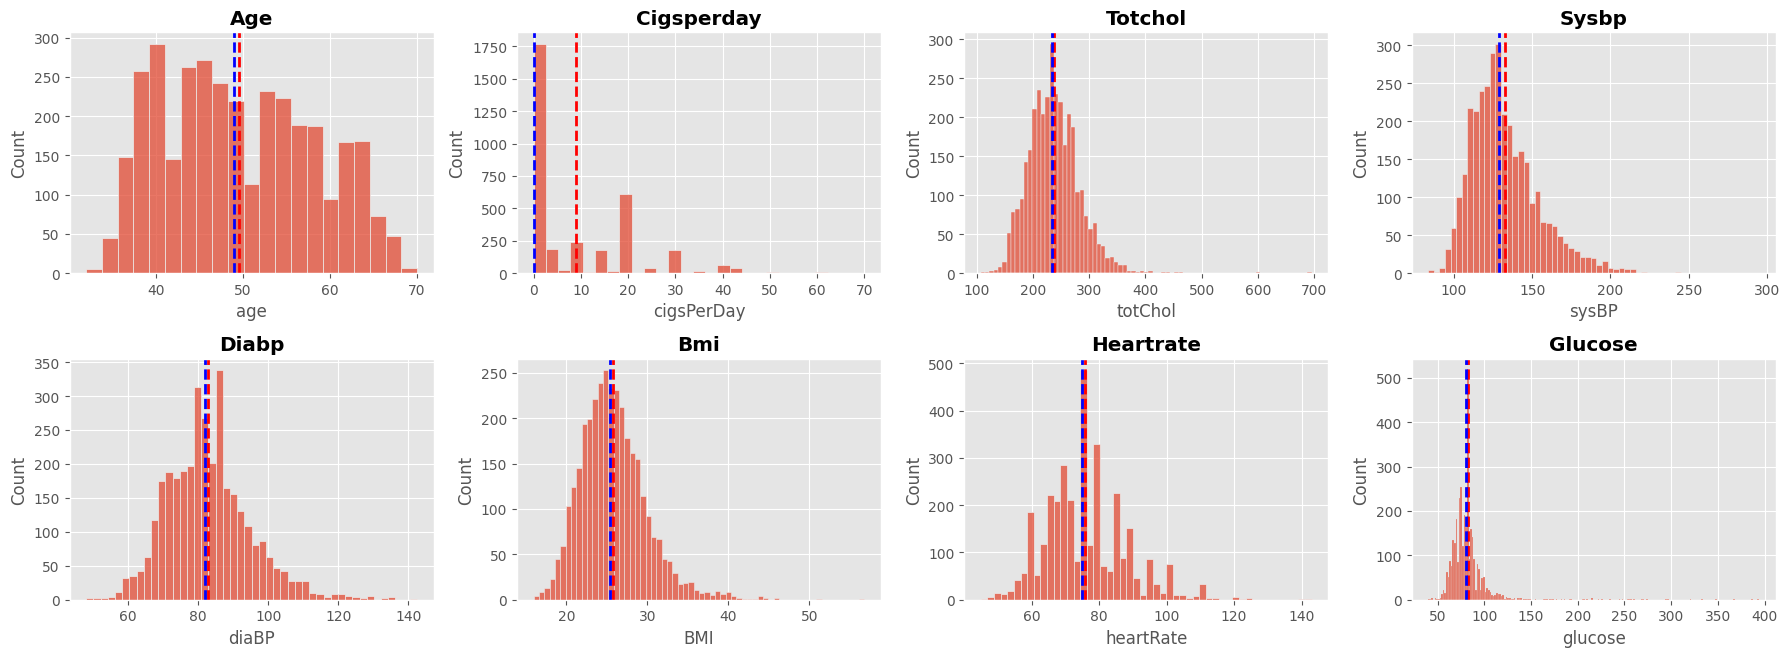

In [22]:
# Chart - 1 visualization code
# Visualizing the mean and median.
plt.figure(figsize=(18,16))
for n,column in enumerate(continous_variable):
  feature = df[column]
  ax=plt.subplot(5, 4, n+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

A histogram is a way to show how frequently different values occur in a set of data. It uses bars to represent different groups of values, with the height of each bar showing how many values fall into that group. It's a useful tool for understanding patterns in data, like how spread out the values are or where the most common values are located.

##### 2. What is/are the insight(s) found from the chart?



*   Based on the histogram analysis of the dataset, it was found that the age of the majority of the individuals falls between the range of 40-60 years old. However, there are a few individuals in the dataset who are younger than 30 or older than 70.

*   In terms of smoking habits, most of the individuals in the dataset smoke less than 10 cigarettes per day, while a few individuals smoke more than 20 cigarettes per day.

* The histogram of the total cholesterol levels shows that the majority of individuals have levels between 200-250 mg/dL, with some individuals having levels lower than 160 mg/dL or higher than 300 mg/dL.

* Regarding blood pressure, the majority of individuals have systolic blood pressure levels between 120-140 mmHg, with a few individuals having levels lower than 90 mmHg or higher than 160 mmHg. Similarly, the majority of individuals have diastolic blood pressure levels between 80-90 mmHg, with a few individuals having levels below 60 mmHg or above 100 mmHg.

*   In terms of body mass index, the majority of individuals have a BMI between 24-26, while a few individuals have a BMI below 18 or above 35.

*   The histogram of heart rate shows that the majority of individuals have a heart rate between 60-90 beats per minute, while a few individuals have a heart rate below 50 beats per minute or above 100 beats per minute.

* Finally, the histogram of blood glucose levels indicates that most individuals have levels between 70-90 mg/dL, while a few individuals have levels below 60 mg/dL or above 130 mg/dL.

#### Chart - 2(Distribution of categorical features)

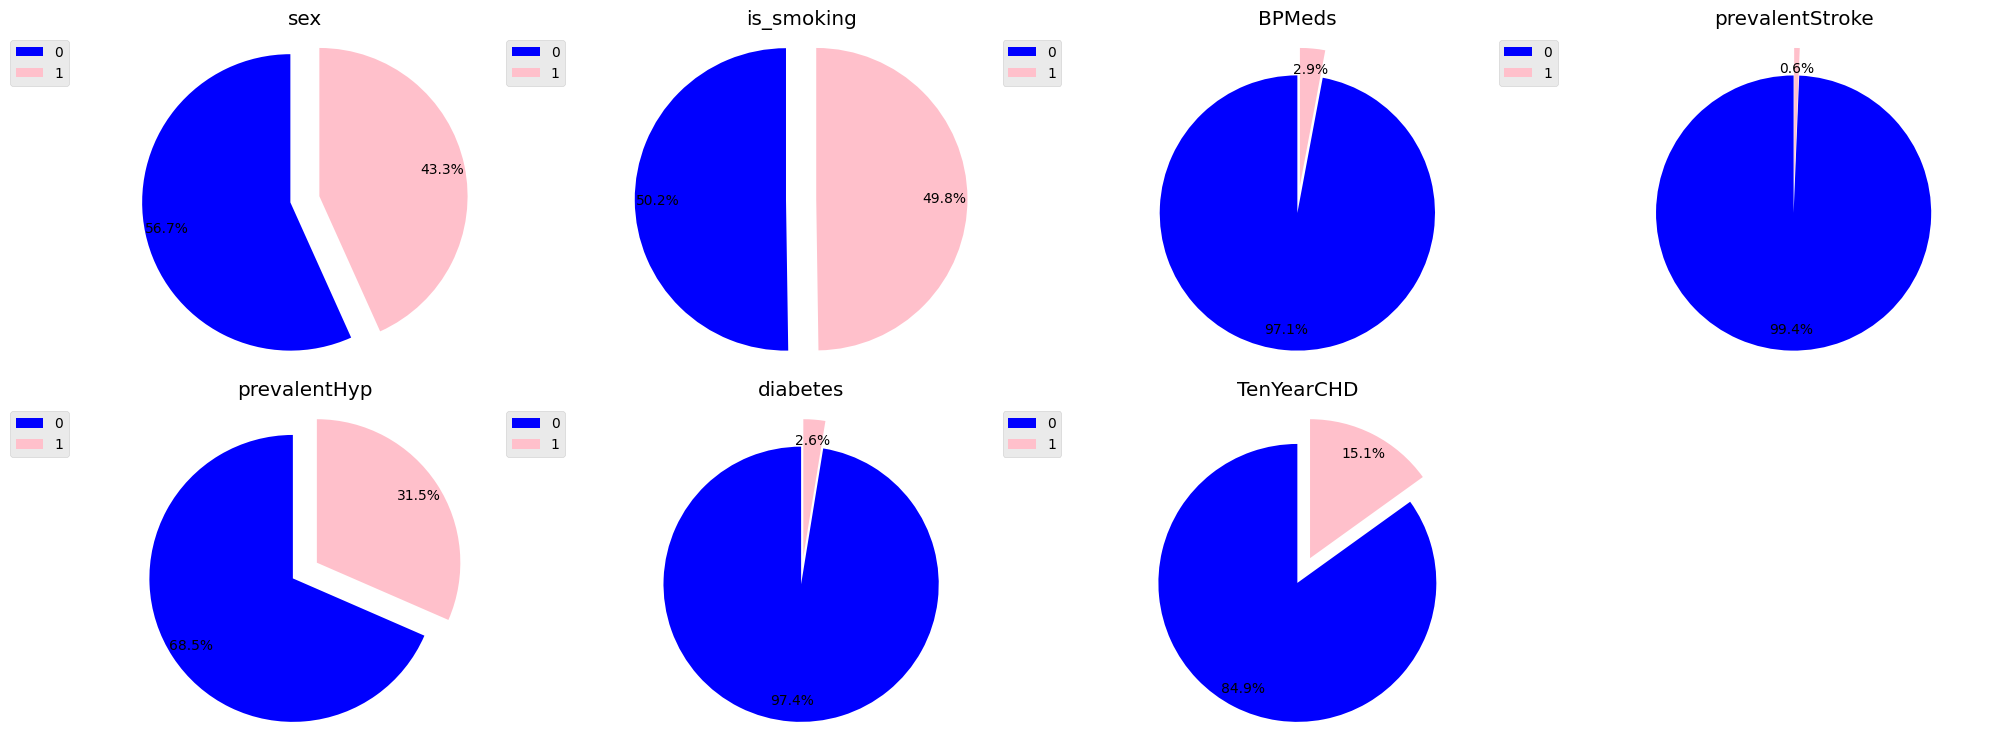

In [23]:
# Chart - 2 visualization code

plt.figure(figsize=(20,15))
labels = '0', '1'
colors = ['blue', 'pink']
explode = [0, 0.2]
for i, j in enumerate(categorical_variable[1:]):
    plt.subplot(4, 4, i+1)
    data = df[j].value_counts()
    plt.pie(data, explode=explode, colors=colors, startangle=90, autopct='%1.1f%%', pctdistance=0.85)
    plt.legend(labels, loc='upper right', bbox_to_anchor=(-0.1, 1))
    plt.title(j)
    plt.axis('equal')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The code creates pie charts to show how different groups compare in a dataset. Pie charts are used to display different parts of a whole. In this case, the parts are different categories or groups in the data. The code is creating a separate pie chart for each category and labeling them so you can see how much of the whole each category represents.

##### 2. What is/are the insight(s) found from the chart?

The insights obtained from the pie charts are as follows:

1. Among the individuals in the dataset, 56.7% are female and the remaining 43.3% are male.

2. Approximately 50.24% of the individuals in the dataset are smokers.

3. Only 2.9% of the individuals in the dataset take blood pressure medicines.

4. 0.6% of the individuals in the dataset have a history of strokes, while 31.5% have a history of hypertension.

5. 2.6% of the individuals in the dataset have diabetes.

6. 15.1% of the individuals in the dataset have a chance of getting heart diseases in ten years.

#### Chart - 3 (Distribution of Education levels)

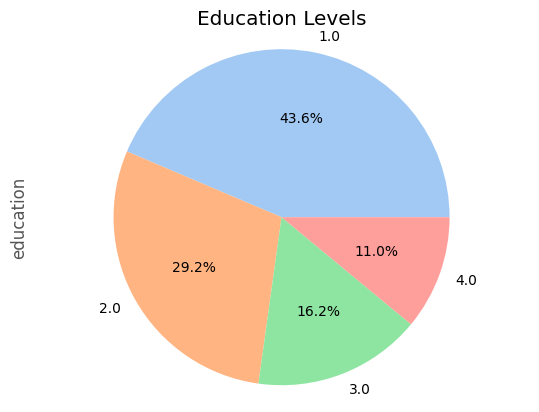

In [24]:
# Chart - 3 visualization code                #visualize the distribution of the 'education' variable in the dataset.
# count values for education variable
edu_counts = df['education'].value_counts()

# create a pie chart using Pandas
edu_counts.plot(kind='pie', colors=sns.color_palette('pastel'), autopct='%1.1f%%')
plt.title('Education Levels')
plt.axis('equal')

# display the chart
plt.show()


##### 1. Why did you pick the specific chart?

The pie chart is a good choice for representing categorical data with a few distinct categories. In this case, the variable being visualized is "education" which has a limited number of discrete values. Pie charts can effectively show the proportion of each category in relation to the whole, making it easy to quickly compare the sizes of each category. Additionally, the use of colors and labels can help make the chart more visually appealing and easy to understand.

##### 2. What is/are the insight(s) found from the chart?

The pie chart shows the distribution of education levels in a dataset, and the insights that can be drawn are that the majority of the population have Education Level - 1 with 43.6%, while the least education level is 4 with 11.0%. This means that the dataset has a higher proportion of individuals with lower education levels, and fewer individuals with higher education levels.

**Bivariate Analysis**

#### Chart - 4(Repression plot of feature vs TenYearCHD)

In [25]:
# Lets make a copy of original dataframe and make all features numeric in order to visualize them properly
df_copied= df.copy()

In [26]:
# Defining a label encoder based on above data
encoder = {'sex':{'M':1, 'F':0},'is_smoking':{'YES':1, 'NO': 0}}

# Label Encoding
df_copied = df_copied.replace(encoder)

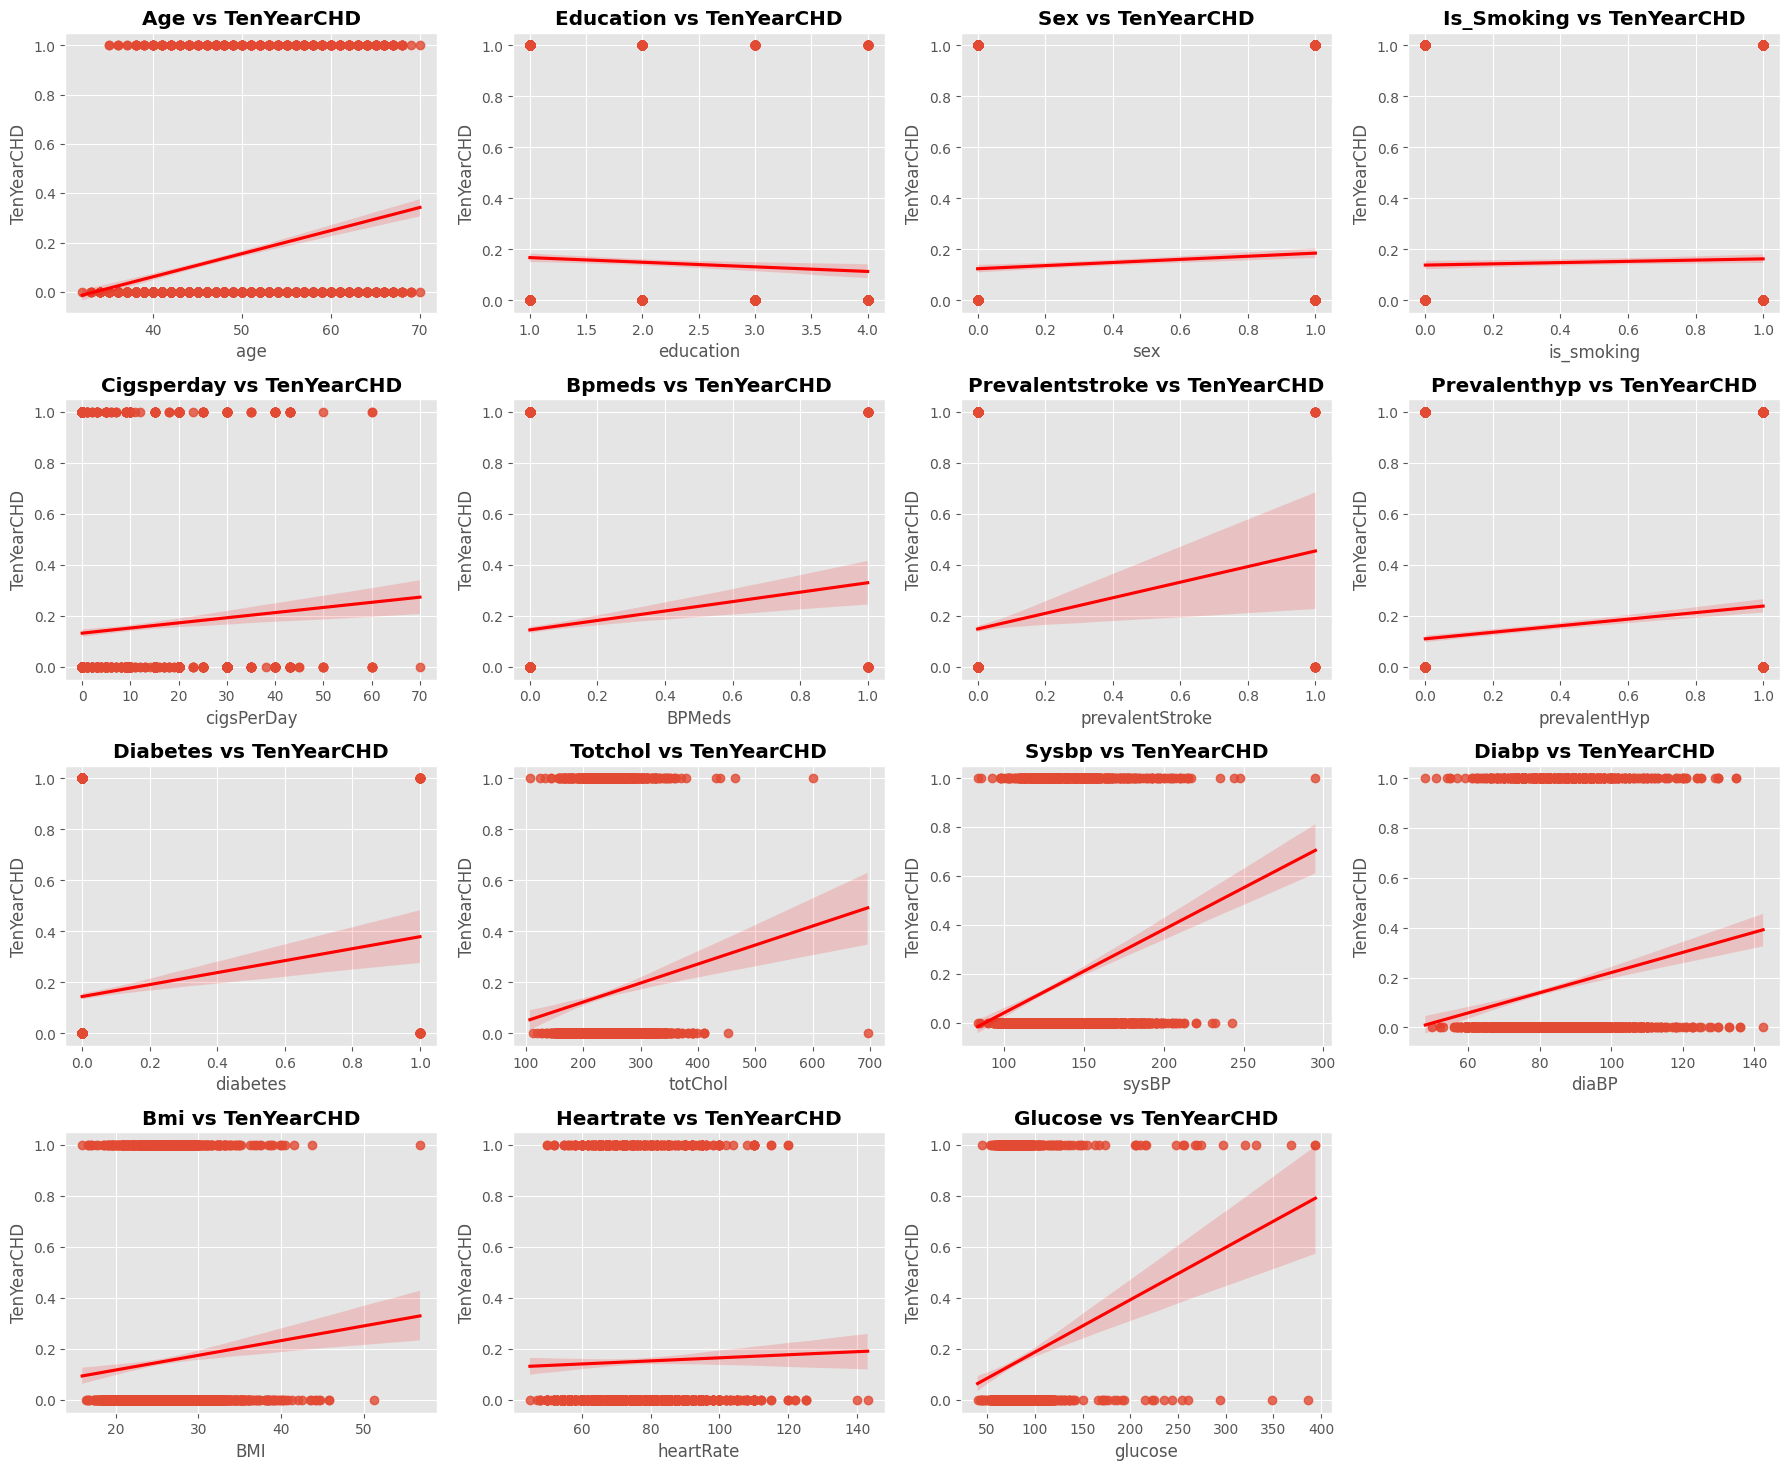

In [27]:
# Chart - 4 visualization code
plt.figure(figsize=(18, 18))
for i, feature in enumerate(df.columns[:-1]):
    ax = plt.subplot(5, 4, i+1)
    sns.regplot(x=feature, y='TenYearCHD', data=df_copied, ax=ax, line_kws={"color": "red"})
    ax.set_title(f'{feature.title()} vs TenYearCHD', weight='bold')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The scatter plot with regression line is a good choice to visualize the relationship between two continuous variables. In this case, the plot shows the relationship between each risk factor (e.g. age, BMI, etc.) and the TenYearCHD variable, which is a binary outcome (0 or 1) indicating whether the individual developed coronary heart disease in the next 10 years or not. The regression line can help to identify any trends or patterns in the data and show the direction of the relationship between the variables.

##### 2. What is/are the insight(s) found from the chart?

Following features have a positive relation with TenYearCHD :-

Age

Sex

CigsPerDay

BPMeds

prevalentStroke

prevalentHYP

Diabetes

TotChol

sysBP

diaBP

BMI

Glucose

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact as they provide valuable information regarding the factors that have a positive correlation with the TenYearCHD. This information can be used to identify high-risk individuals and develop targeted prevention and treatment strategies.

#### Chart - 5(Countplot of categorical features with target variable)

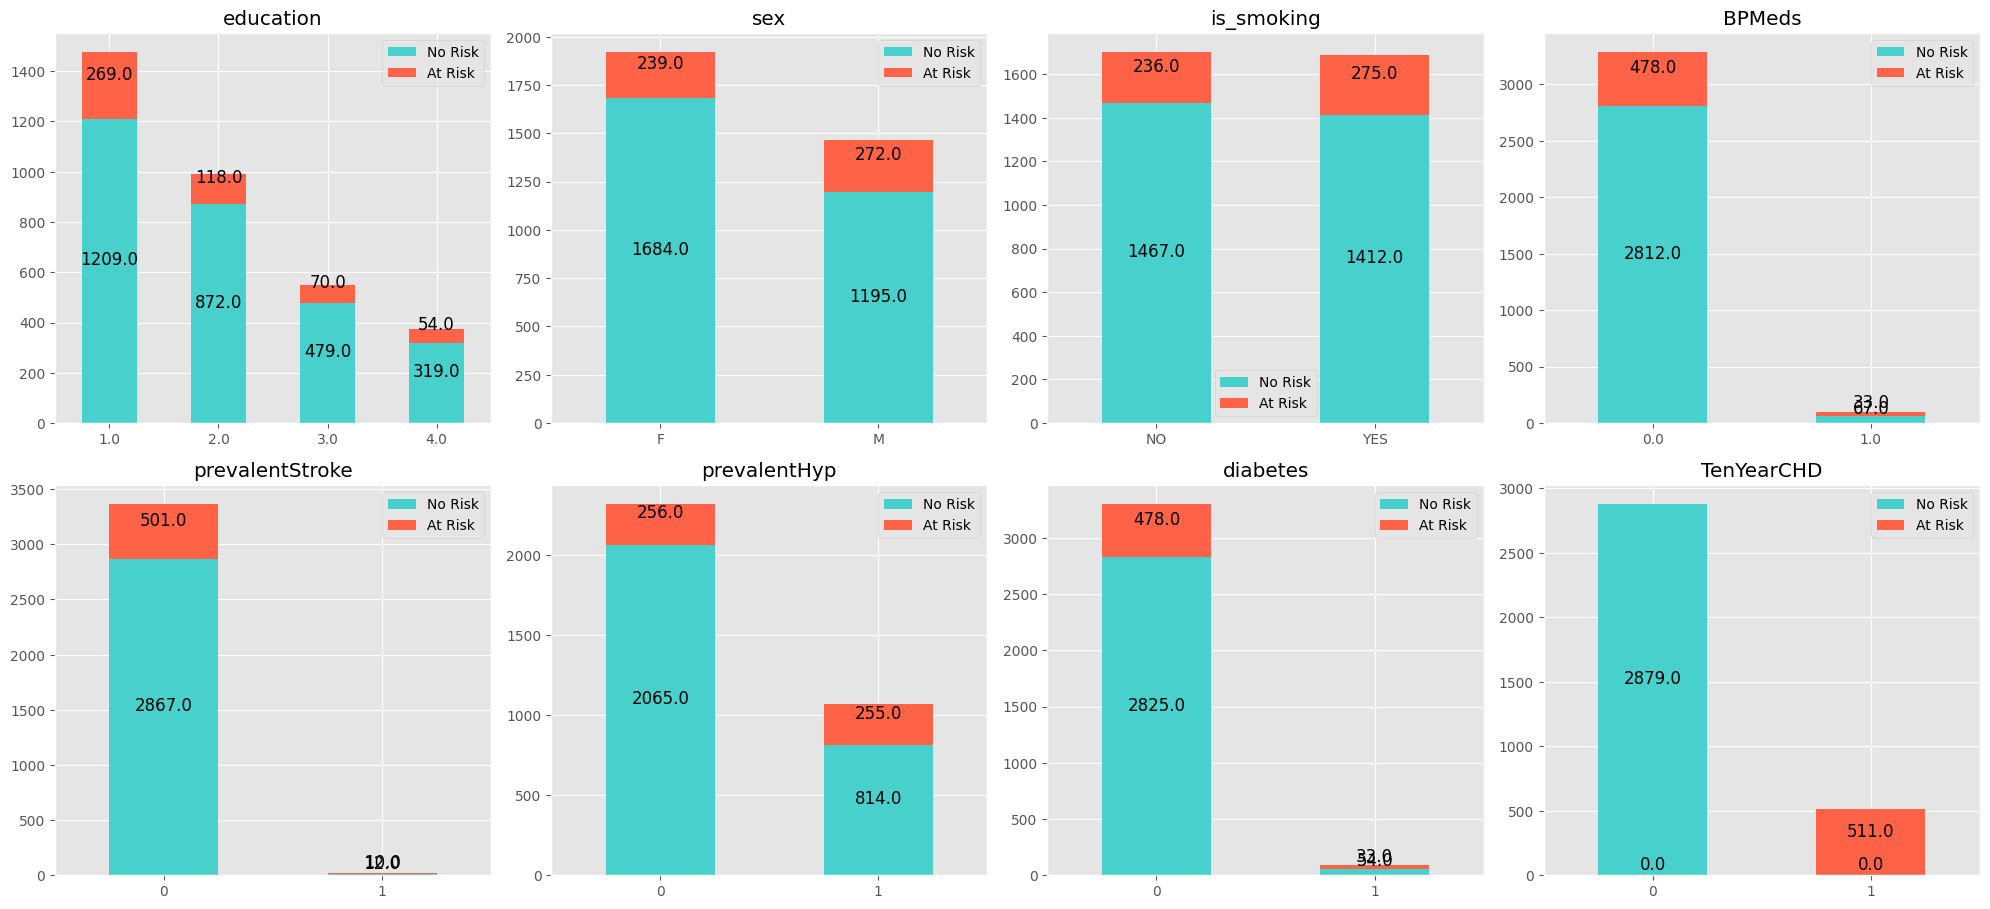

In [28]:
# Chart - 5 visualization code
plt.figure(figsize=(20,18))
for i, j in enumerate(categorical_variable):
    plt.subplot(4, 4, i+1)
    ct = pd.crosstab(df[j], df['TenYearCHD'])
    ct.plot(kind='bar', stacked=True, color=['mediumturquoise', 'tomato'], ax=plt.gca())
    plt.title(j)
    plt.xlabel('')
    plt.legend(['No Risk', 'At Risk'])
    plt.xticks(rotation=0)
    for bar in plt.gca().patches:
        plt.gca().annotate(bar.get_height(), 
                           (bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2),
                           ha='center', va='center', size=12, xytext=(0, 8),
                           textcoords='offset points')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The specific chart used is a countplot with hue, which helps to visualize the count of different categorical variables while also differentiating between the values of the TenYearCHD column. This is a useful chart for exploring the relationship between the categorical variables and the target variable, and it can help to identify which categories have a higher or lower risk of developing heart disease.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the count plots:

- BP Problems, prevalent strokes, prevalent hypertension, and diabetes have a significant impact on the likelihood of getting heart diseases.

- Individuals at education Level-1 have a slightly higher percentage of getting suffered from CHD compared to other education levels.

- Males are more prone to CHD than females.

- Smokers have a slightly higher chance of suffering from CHD than non-smokers.

- Patients who are not on BP medication have minimal chances compared to medicated patients of suffering from CHD.

- Patients who have a history of stroke or hypertension and diabetes are more prone to CHD.

**Multivariate Analysis**

#### Chart - 6(Relation between Sex and CigsPerDAY with TenYearCHD)

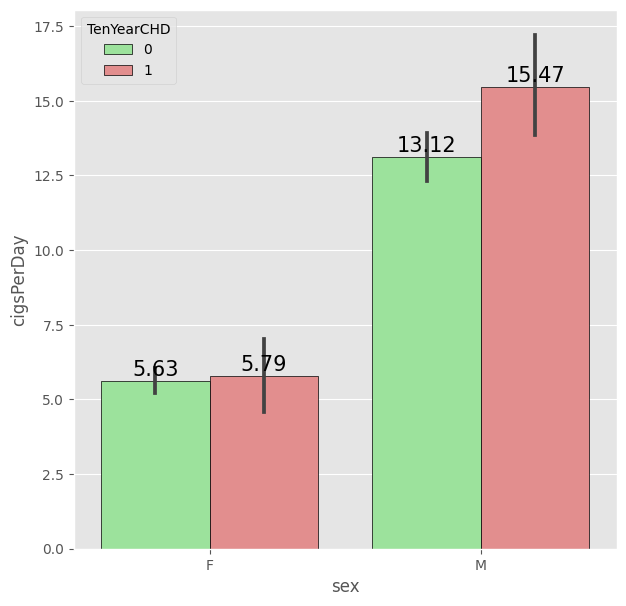

In [29]:
## Chart - 6 visualization code
plt.figure(figsize=(7,7))
plots=sns.barplot(x='sex', y='cigsPerDay', hue='TenYearCHD', data=df, palette=["lightgreen","lightcoral"], edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

This chart shows the average number of cigarettes smoked per day for males and females in the dataset, and also indicates if they are at risk for heart disease or not. The bars represent the average number of cigarettes smoked, and the colors indicate the risk for heart disease. The green color represents no risk, and the red color represents at risk. The chart helps us understand the relationship between smoking and the risk of heart disease for males and females.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the chart in points:

- The chart shows the number of cigarettes smoked per day by males and females, along with the risk of TenYearCHD (Ten-Year Risk of Developing Coronary Heart Disease).

- The majority of individuals who smoke cigarettes are males.

- Males who smoke more cigarettes have a higher risk of TenYearCHD than females who smoke.

- For females, the risk of TenYearCHD does not seem to be affected by whether or not they smoke cigarettes.

- Overall, the chart suggests that smoking is a risk factor for TenYearCHD, particularly for males who smoke more cigarettes per day.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact by identifying the key factors that contribute to heart diseases. This can help businesses, especially those in the healthcare industry, to develop targeted prevention and treatment strategies for patients with high risk factors. For example, a healthcare company can develop programs to promote healthy lifestyle choices and regular checkups for patients with high blood pressure, diabetes, or a history of stroke.

#### Chart - 7(Are glucose level impacted by CHD and Diabetes?)

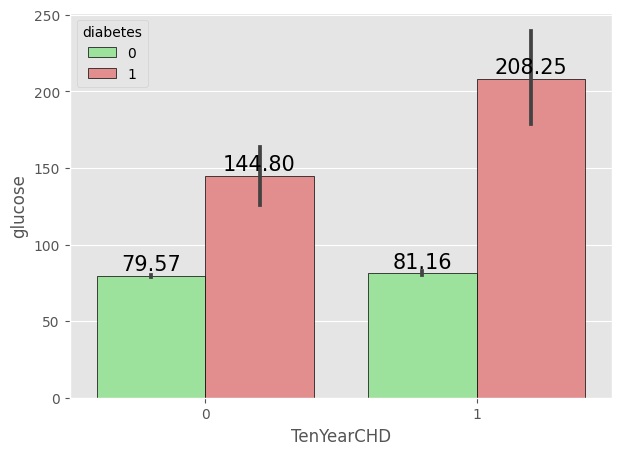

In [30]:
# Chart - 7 visualization code

plt.figure(figsize=(7,5))
plots=sns.barplot(x=df['TenYearCHD'],y=df['glucose'],hue=df['diabetes'],edgecolor='black', palette=["lightgreen","lightcoral"])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

I picked this specific chart because it shows the relationship between the target variable (TenYearCHD) and the feature "glucose" with respect to the presence of diabetes. The use of different colors for diabetes and non-diabetes categories helps in easy visualization of the impact of glucose levels on the risk of heart disease over different categories of diabetes.

##### 2. What is/are the insight(s) found from the chart?

The insights from the chart are:

- Higher glucose levels are positively correlated with the risk of developing heart diseases. This implies that people with diabetes or high glucose levels have a higher risk of developing cardiovascular disease.
- Diabetic patients have a higher chance of developing heart diseases than non-diabetic patients. Therefore, it is essential to manage glucose levels for diabetic patients to reduce the risk of developing cardiovascular disease.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This plot shows that people with higher blood sugar levels have a greater risk of developing heart disease, especially those with diabetes. This information can help healthcare professionals and individuals take steps to manage blood sugar levels and reduce their risk of heart disease.

#### Chart - 8 - Correlation Heatmap

<Axes: >

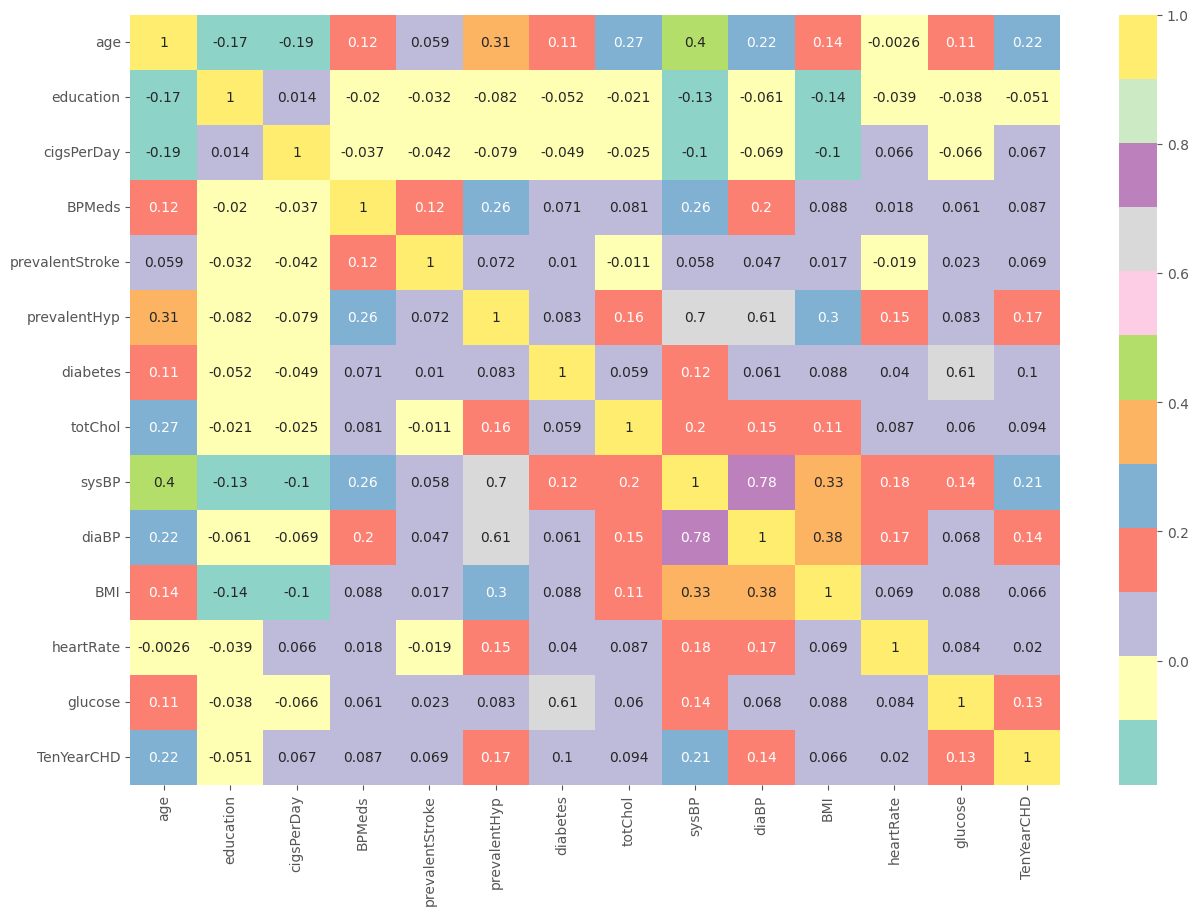

In [31]:
# Chart - 8 visualization code

# Correlation Heatmap visualization code
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap=sns.color_palette("Set3"))

##### 1. Why did you pick the specific chart?

The correlation heatmap is a useful chart to visualize the correlation between different variables in a dataset. It is a common practice to create a correlation heatmap to quickly identify the most important relationships in a dataset.

By using this chart, we can easily see which variables are positively or negatively correlated with each other, and which ones have the highest or lowest correlation values. Therefore, it can help to identify the most important variables to focus on for further analysis and modeling.

##### 2. What is/are the insight(s) found from the chart?

We can see that following have strong correlation :

diaBP and sysBP

prevalentHyp and diaBP

prevalentHyp and sysBP

diabetes and glucose

Following have weak correlation :

glucose and cigPerDay
BMI and education , diaBP and education , sysBP and education , prevalentHyp and education , age and education
BMI and cigPerDay , diaBP and cigPerDay , sysBP and cigPerDay , prevalentHyp and cigPerDay , age and cigPerDay

#### Chart - 9 - Pair Plot 

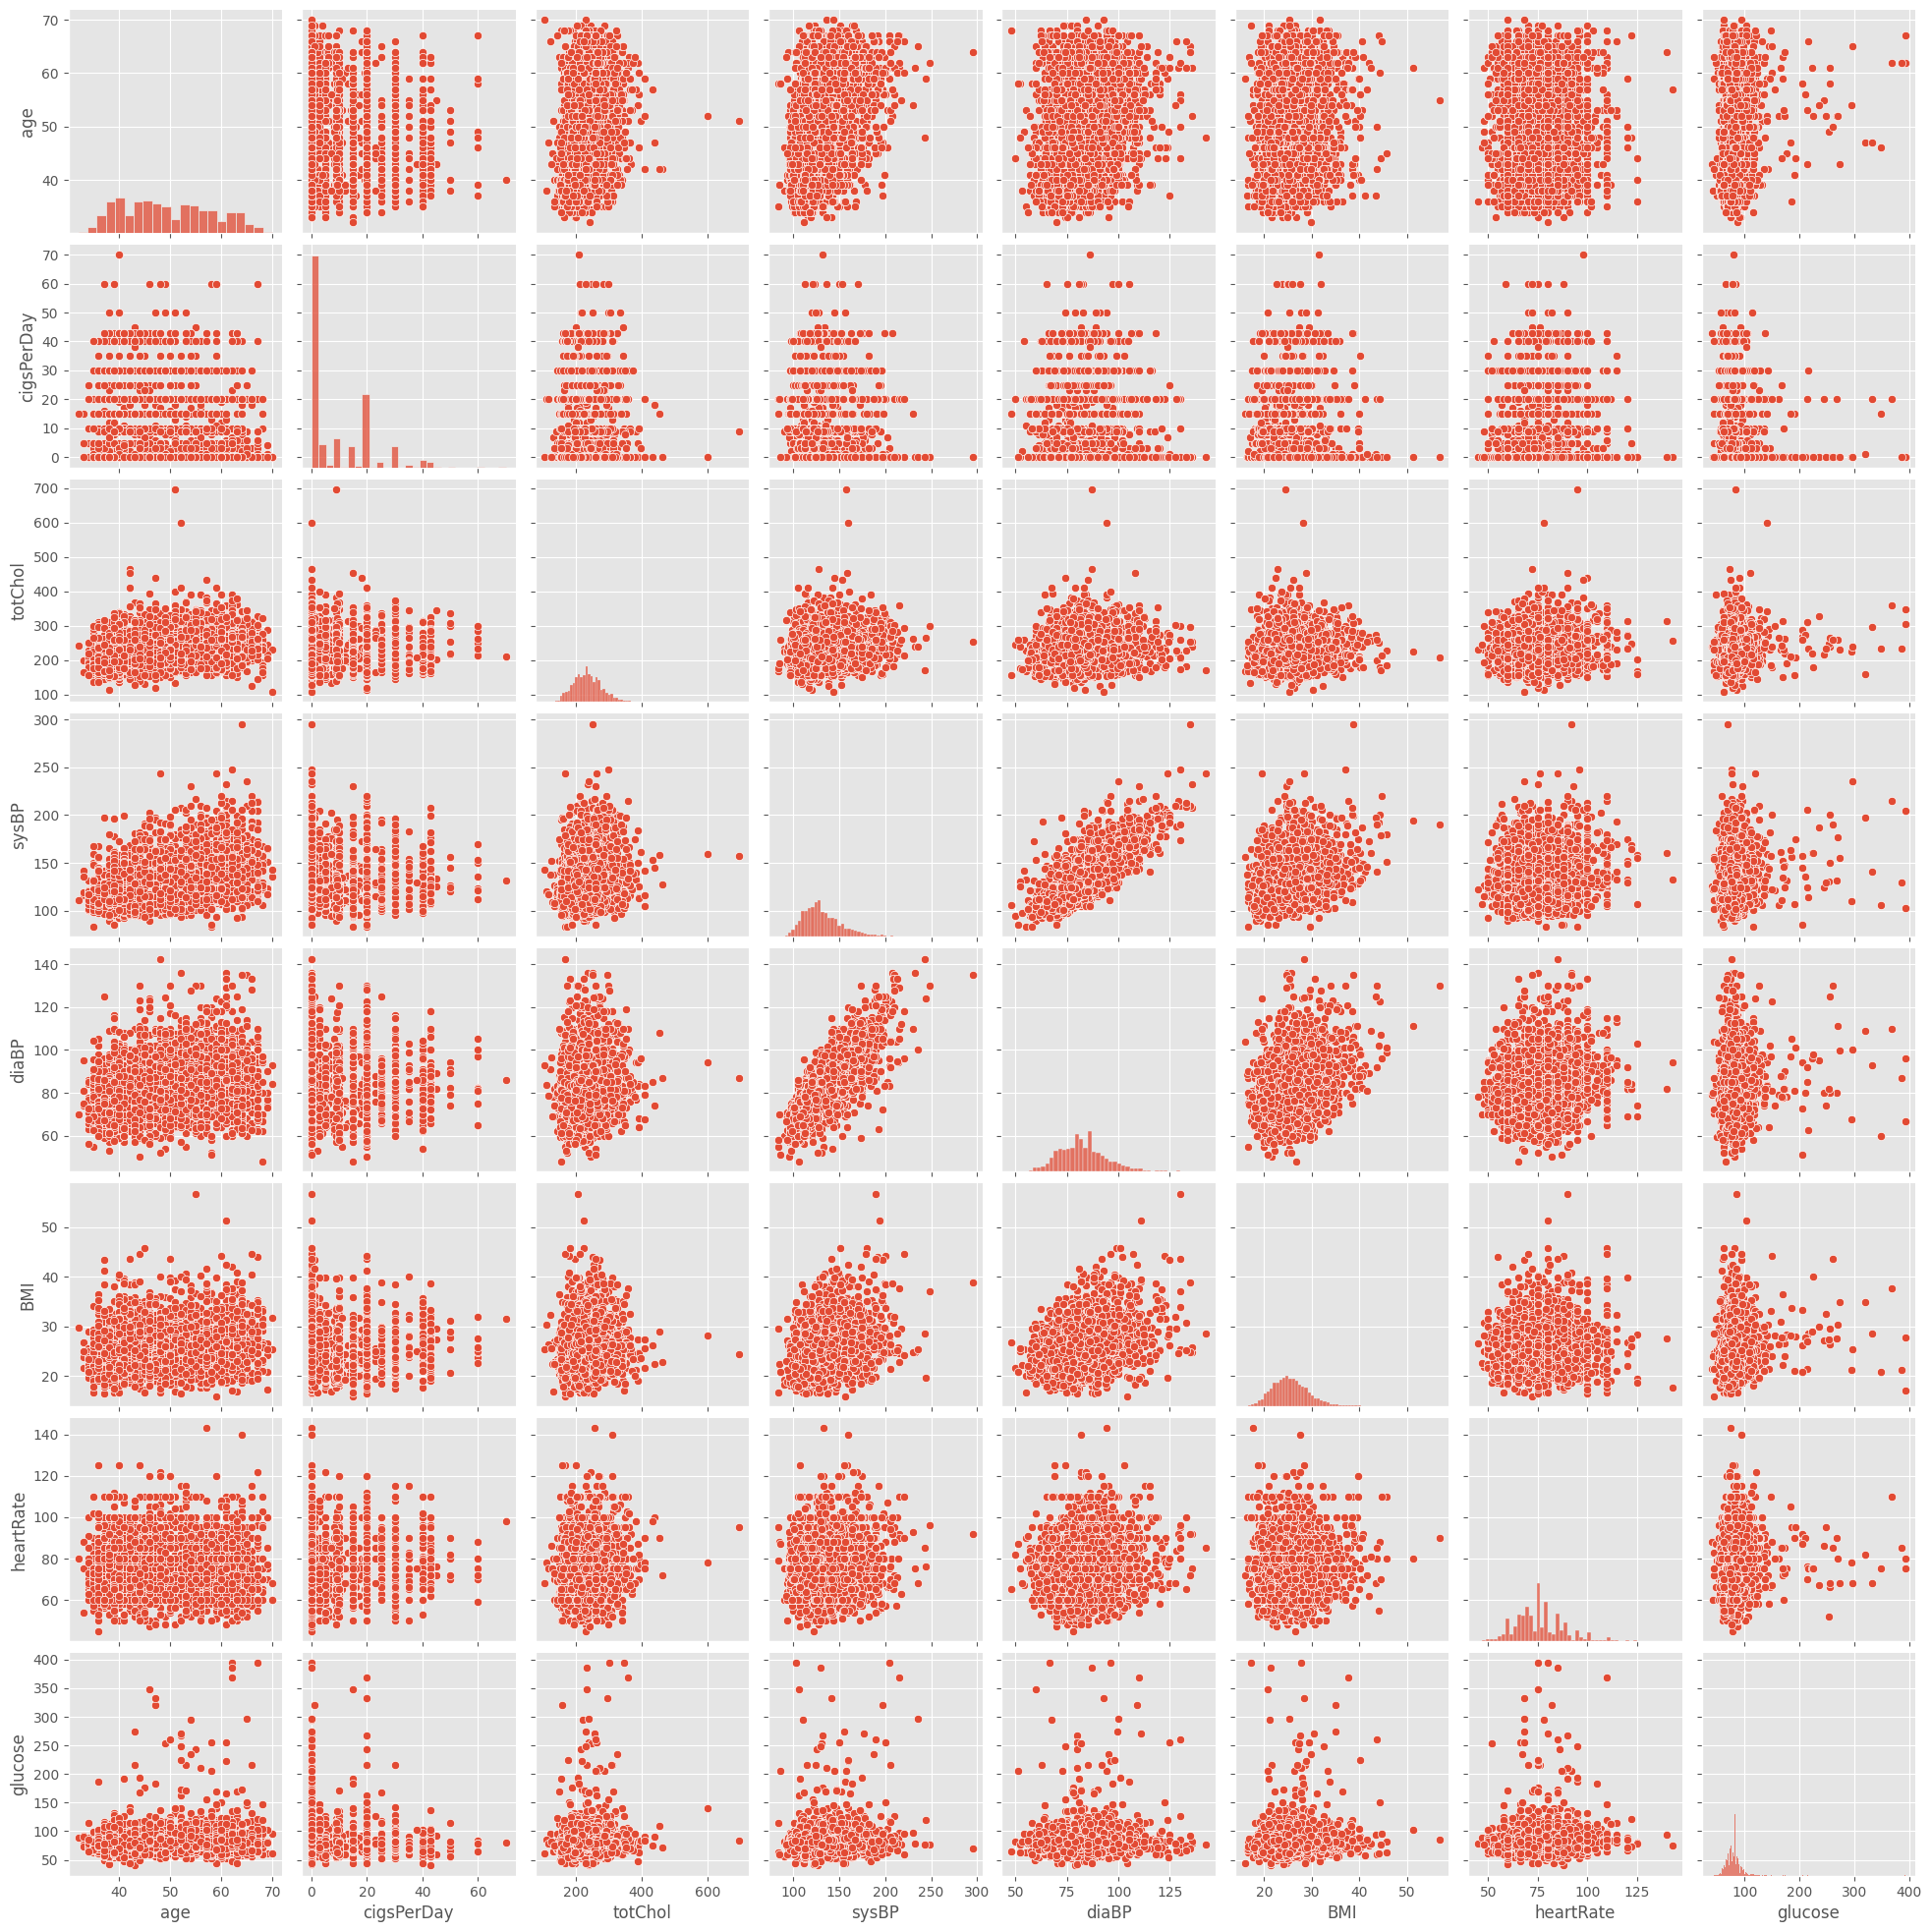

In [32]:
# Pair Plot visualization code
sns.pairplot(df[continous_variable])

##### 1. Why did you pick the specific chart?

The pair plot is a useful chart for visualizing the relationships between all the continuous variables in the dataset.Hence, it can provide us with a comprehensive understanding of the dataset's continuous variable relationships.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



*   Null Hypothesis(H0) - Data set does not have any outliers.

*  Alternative Hypothesis(H1) - Dataset has outliers.



#### 2. Perform an appropriate statistical test.

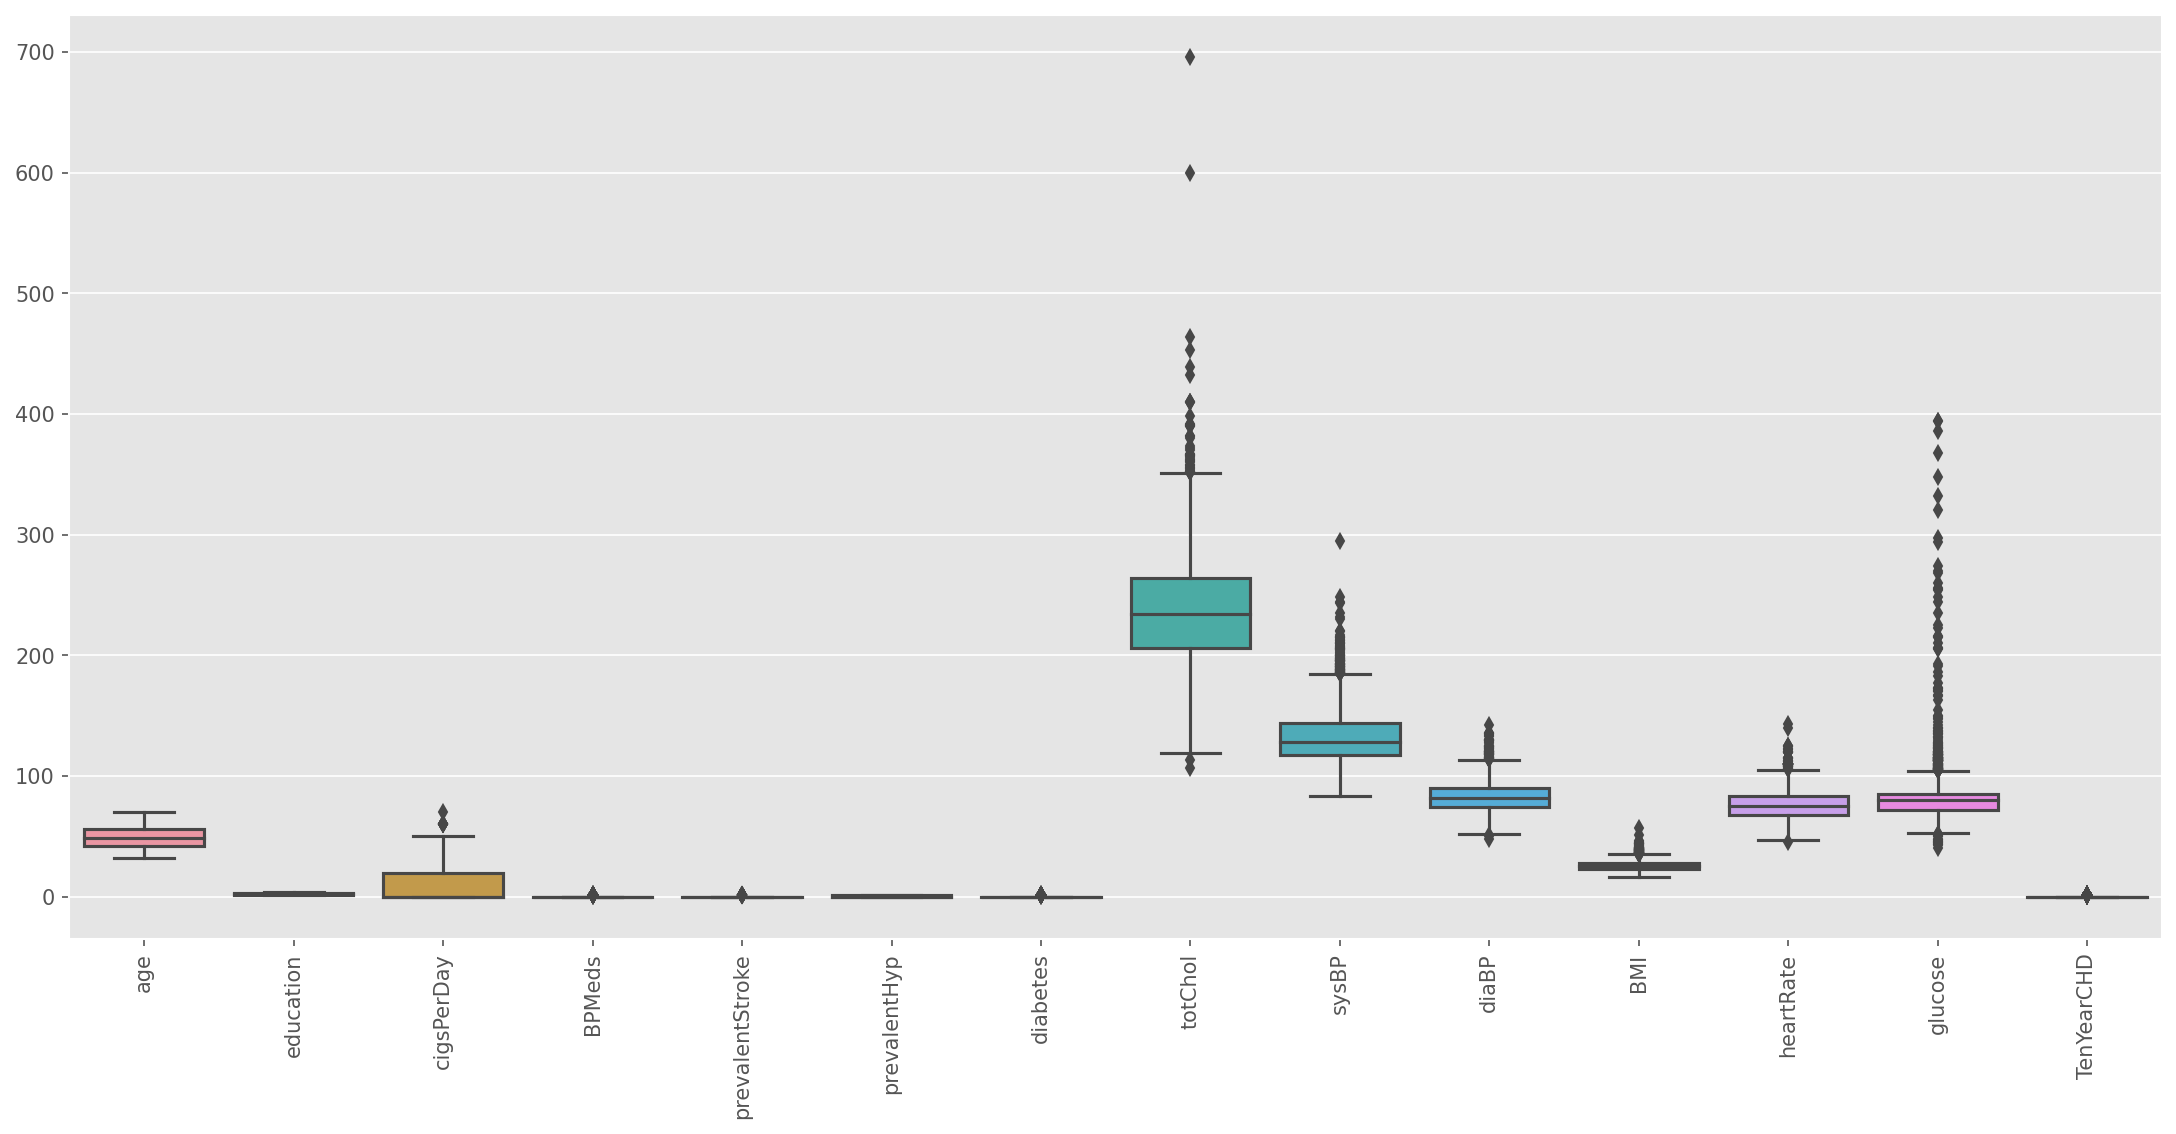

In [33]:

# Create a figure with a size of 18x8 inches and a resolution of 150 dpi
fig, ax = plt.subplots(figsize=(18, 8), dpi=150)

# Plot a boxplot of the dataframe
sns.boxplot(data=df, ax=ax)

# Rotate the x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

##### Which statistical test have you done to obtain P-Value?

We have used boxplots for the hypothesis testing, as we are determining the presence of outliers.

##### Why did you choose the specific statistical test?

Boxplots display a 5 number summary of data, this summary is first quartile, mean, third quartile, minimum, maximum, and the values beyond min and max are the outliers. and in the above test we can clearly see that we have to reject our null hypothesis as our dataset has a lot of outliers.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



*  Null Hypothesis(H0) - Increasing age is an important factor that leads to cardiovascular diseases.
* Alternative Hypothesis(H1) - Age is not related with cardiovascular risks.





#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# Create a contingency table
cont_table = pd.crosstab(df['age'], df['TenYearCHD'])

# Perform chi-square test
chi2, p_val, dof, exp_freq = chi2_contingency(cont_table)

# Set the significance level
alpha = 0.05

# Print the results
print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p_val:.2f}")

if p_val <= alpha:
    print("Reject null hypothesis. There is a significant association between age and TenYearCHD.")
else:
    print("Accept null hypothesis. There is no significant association between age and TenYearCHD.")


Chi-square statistic: 205.23
P-value: 0.00
Reject null hypothesis. There is a significant association between age and TenYearCHD.


##### Which statistical test have you done to obtain P-Value?

Chi Square Test

##### Why did you choose the specific statistical test?

 we want to know if there is a significant relationship between age and the likelihood of developing TenYearCHD. By performing a chi-square test on the contingency table of age and TenYearCHD, we can determine whether the association we observed is likely due to chance or if there is a real relationship between the two variables. If the p-value is less than our chosen level of significance (e.g., alpha = 0.05), we can reject the null hypothesis of independence and conclude that there is a significant association between age and the likelihood of developing TenYearCHD.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [35]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

we have already delt with null/missing values from our dataset.

#### What all missing value imputation techniques have you used and why did you use those techniques?

Checked the outliers by plotting the box plot and then replaced the null values of various variables with mean, median,mode and 0 accordingly.

### 2. Handling Outliers

In [36]:
# defining the code for outlier detection and percentage using IQR.
def detect_outliers(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    num_outliers = len(outliers)
    percent_outliers = round((num_outliers / len(data)) * 100, 2)
    
    print("Outlier detection using IQR method:")
    print(f"   Q1: {q1:.2f}")
    print(f"   Q3: {q3:.2f}")
    print(f"   IQR: {iqr:.2f}")
    print(f"   Lower bound: {lower_bound:.2f}")
    print(f"   Upper bound: {upper_bound:.2f}")
    print(f"   Number of outliers: {num_outliers}")
    print(f"   Percentage of outliers: {percent_outliers}%")


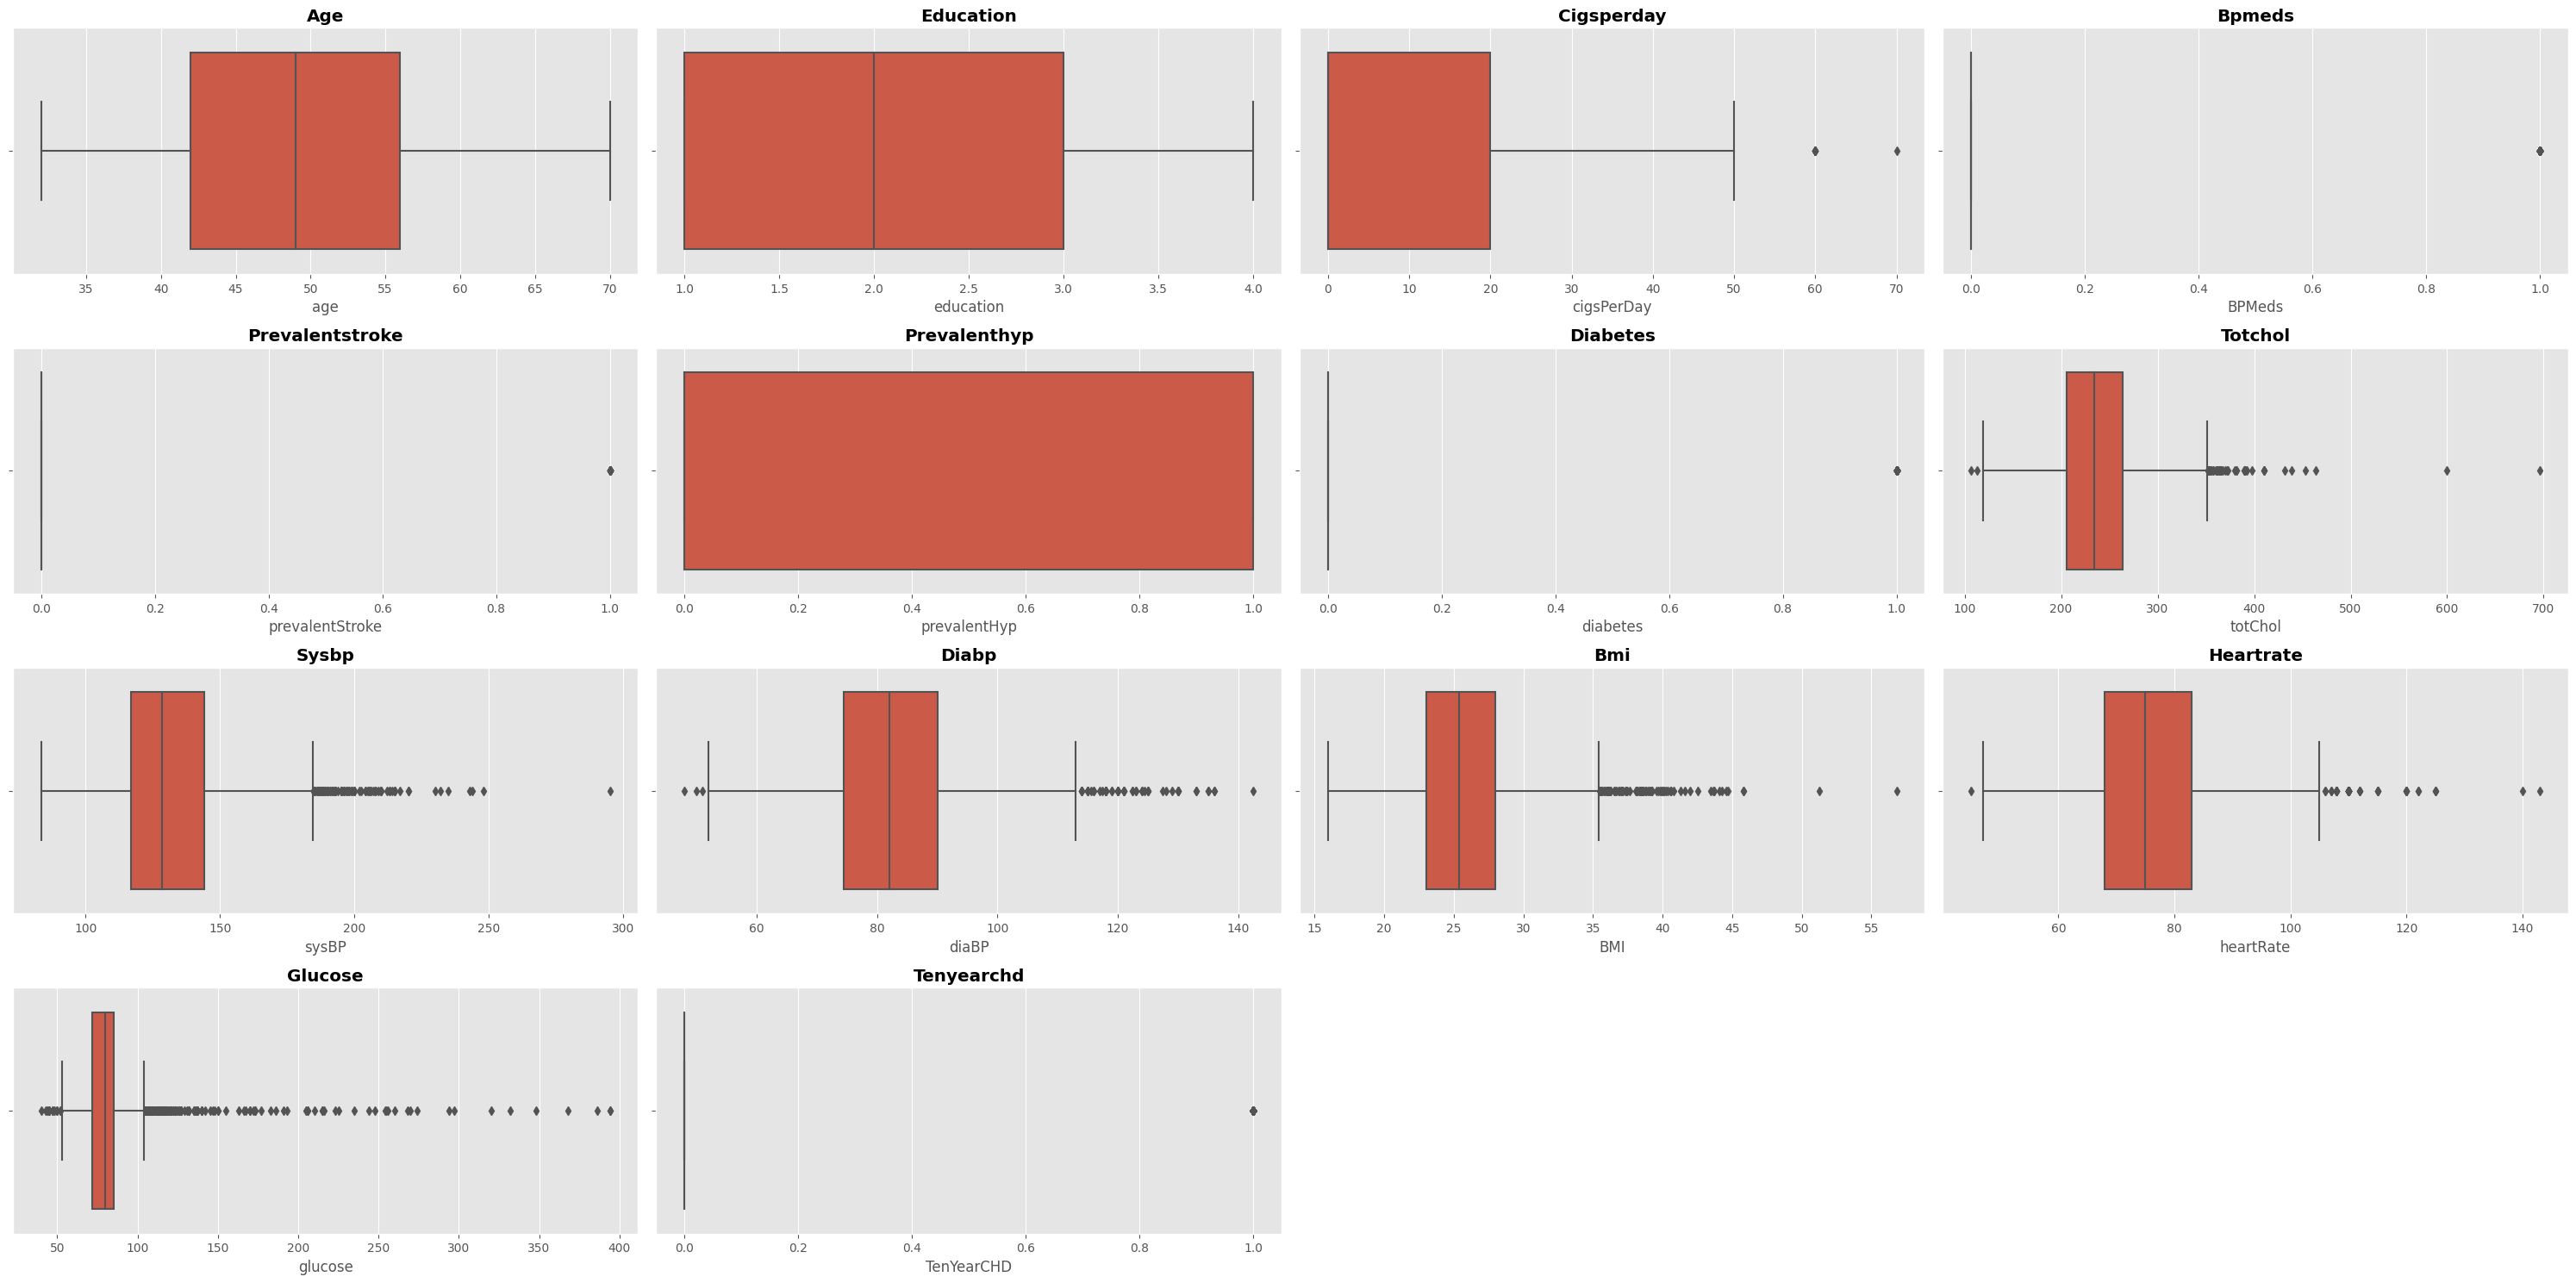

In [37]:
# Get a list of continuous variables
continous_variables = [col for col in df.columns if df[col].dtype != 'object']

# Plot box plots for each variable
plt.figure(figsize=(30, 15))
for i, col in enumerate(continous_variables):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df[col])
    plt.title(col.title(), weight='bold')
plt.tight_layout()


In [38]:
# Determining IQR, Lower and Upper bound and number out outliers present in each of the continous numerical feature
for col in df.select_dtypes(include=np.number):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col.title()}:\nIQR: {iqr:.2f}\nLower bound: {lower_bound:.2f}\nUpper bound: {upper_bound:.2f}\nNumber of outliers: {len(outliers)}\n")


Age:
IQR: 14.00
Lower bound: 21.00
Upper bound: 77.00
Number of outliers: 0

Education:
IQR: 2.00
Lower bound: -2.00
Upper bound: 6.00
Number of outliers: 0

Cigsperday:
IQR: 20.00
Lower bound: -30.00
Upper bound: 50.00
Number of outliers: 9

Bpmeds:
IQR: 0.00
Lower bound: 0.00
Upper bound: 0.00
Number of outliers: 100

Prevalentstroke:
IQR: 0.00
Lower bound: 0.00
Upper bound: 0.00
Number of outliers: 22

Prevalenthyp:
IQR: 1.00
Lower bound: -1.50
Upper bound: 2.50
Number of outliers: 0

Diabetes:
IQR: 0.00
Lower bound: 0.00
Upper bound: 0.00
Number of outliers: 87

Totchol:
IQR: 58.00
Lower bound: 119.00
Upper bound: 351.00
Number of outliers: 43

Sysbp:
IQR: 27.00
Lower bound: 76.50
Upper bound: 184.50
Number of outliers: 105

Diabp:
IQR: 15.50
Lower bound: 51.25
Upper bound: 113.25
Number of outliers: 58

Bmi:
IQR: 4.97
Lower bound: 15.58
Upper bound: 35.45
Number of outliers: 79

Heartrate:
IQR: 15.00
Lower bound: 45.50
Upper bound: 105.50
Number of outliers: 64

Glucose:
IQR: 13.0

### 3. Categorical Encoding

In [39]:

# Checking the object dtype variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


Since I have only two object dtype variables, 'sex' and 'is_smoking', with two categories 'Male' and 'Female', 'No' and 'Yes', I can use binary label encoding to convert these categorical variables to integer type. In binary label encoding, each category is assigned a binary value of 0 or 1.

In [40]:

# Encode your categorical columns
df['sex'].replace({'M':0,'F':1},inplace=True)
df['is_smoking'].replace({'NO':0,'YES':1},inplace=True)

In [41]:
# Rechecking the info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   int64  
 3   is_smoking       3390 non-null   int64  
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 423.9 KB


#### What all categorical encoding techniques have you used & why did you use those techniques?


I have two categorical features, 'sex' and 'is_smoking', with object data type. Label encoding is used to convert the categories into a machine-readable form by assigning a unique integer value to each category. I can then change the data type of these features from object to int.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

Not having text data in our project so it is not needed for now

#### 1. Expand Contraction

In [42]:
# Expand Contraction

#### 2. Lower Casing

In [43]:
# Lower Casing

#### 3. Removing Punctuations

In [44]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [45]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [46]:
# Remove Stopwords

In [47]:
# Remove White spaces

#### 6. Rephrase Text

In [48]:
# Rephrase Text

#### 7. Tokenization

In [49]:
# Tokenization

#### 8. Text Normalization

In [50]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [51]:
# POS Taging

#### 10. Text Vectorization

In [52]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [53]:
## Manipulate Features to minimize feature correlation and create new features
# Checking the features to exctract new feature from it
df.head()

age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64        2.0    1           1         3.0     0.0                0   
1   36        4.0    0           0         0.0     0.0                0   
2   46        1.0    1           1        10.0     0.0                0   
3   50        1.0    0           1        20.0     0.0                0   
4   64        1.0    1           1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0  25.38       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

#### 2. Feature Selection

<Axes: >

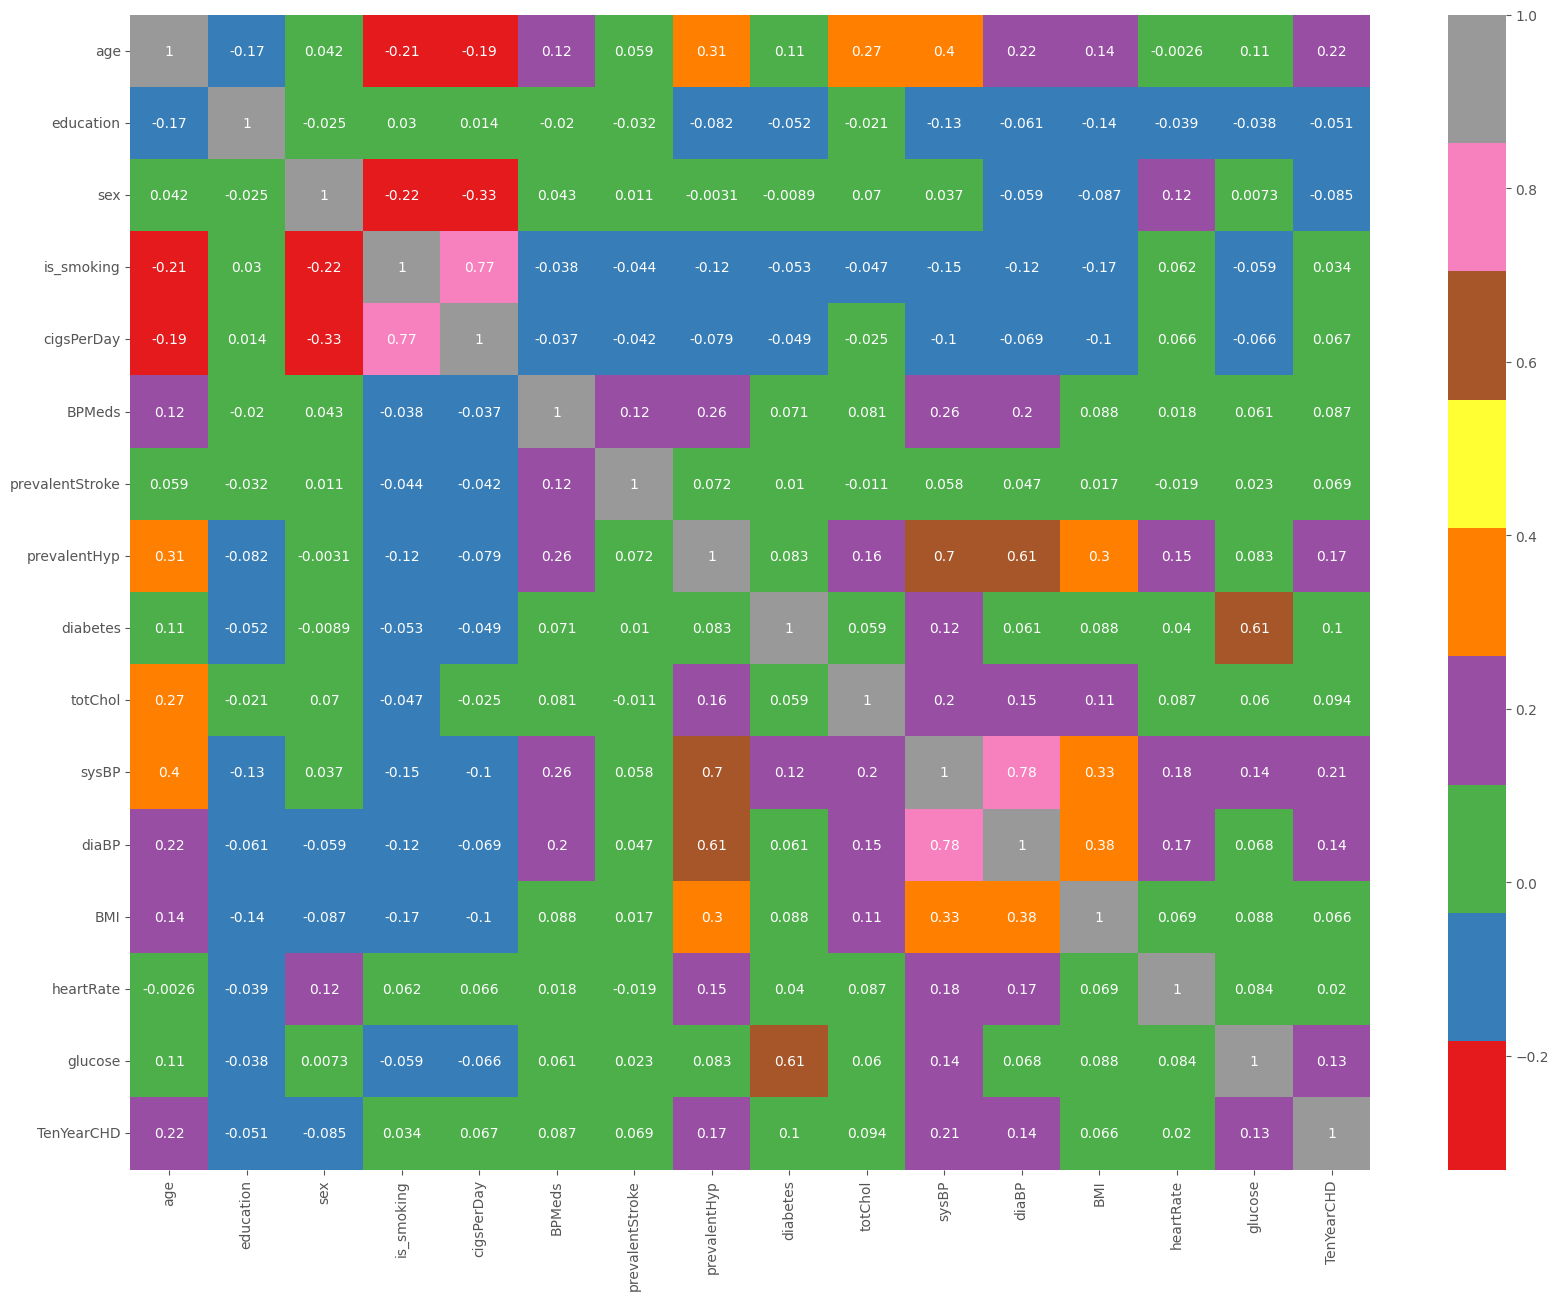

In [54]:

## Select your features wisely to avoid overfitting
# Correlation Heatmap visualization code
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap=sns.color_palette("Set1"))
     

Let's include only those features in our final dataframe that are highly impacting on the dependent variable. For this we are using Variance Inflation Factor technique to determine multicolinearity.

In [55]:
# Defining a function for variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

Calculating VIF(Variance Inflation Factor) by excluding:

"TenYearCHD" -> As it is target variable

"id" -> As it is not giving any information

In [56]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df[[i for i in df.describe().columns if i not in ['id','TenYearCHD']]])

variables         VIF
0               age   41.012222
1         education    4.576530
2               sex    2.758056
3        is_smoking    4.962843
4        cigsPerDay    4.240075
5            BPMeds    1.132906
6   prevalentStroke    1.027013
7      prevalentHyp    2.429433
8          diabetes    1.583323
9           totChol   30.949044
10            sysBP  135.444236
11            diaBP  129.869383
12              BMI   44.134740
13        heartRate   39.710005
14          glucose   20.688777

Now,let's exclude sysBP,diaBP,glucose and diabetes as we have already created two new features using them.along with it we will also exclude is_smoking as it is highly correlated with cigsPerDay.

In [57]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df[[i for i in df.describe().columns if i not in ['id','TenYearCHD','sysBP','diaBP','glucose','diabetes','is_smoking']]])

variables        VIF
0              age  32.908968
1        education   4.394493
2              sex   2.701266
3       cigsPerDay   1.846101
4           BPMeds   1.119808
5  prevalentStroke   1.026097
6     prevalentHyp   1.708733
7          totChol  30.145334
8              BMI  33.411836
9        heartRate  33.352513

Let's exclude tot_chol as it is not impacting much on target variable.

In [58]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df[[i for i in df.describe().columns if i not in ['id','TenYearCHD','sysBP','diaBP','glucose','diabetes','is_smoking','totChol']]])

variables        VIF
0              age  27.141219
1        education   4.324749
2              sex   2.671748
3       cigsPerDay   1.826398
4           BPMeds   1.119097
5  prevalentStroke   1.025349
6     prevalentHyp   1.707402
7              BMI  31.491254
8        heartRate  31.855926

Let's exclude BMI as it is having high VIF and not impacting much on target variable.

In [59]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df[[i for i in df.describe().columns if i not in ['id','TenYearCHD','sysBP','diaBP','glucose','diabetes','is_smoking','totChol','BMI']]])

variables        VIF
0              age  20.308148
1        education   4.284496
2              sex   2.657363
3       cigsPerDay   1.826346
4           BPMeds   1.119088
5  prevalentStroke   1.025341
6     prevalentHyp   1.690556
7        heartRate  24.098969

At last, We will exclude heartRate as it is having high VIF and not impacting much on target variable.

In [60]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df[[i for i in df.describe().columns if i not in ['id','TenYearCHD','sysBP','diaBP','glucose','diabetes','is_smoking','education','totChol','BMI','heartRate']]])

variables       VIF
0              age  4.136838
1              sex  2.442268
2       cigsPerDay  1.616447
3           BPMeds  1.116238
4  prevalentStroke  1.024090
5     prevalentHyp  1.672434

In [61]:

# Creating final dataframe considering above selected features
final_df= df[['age', 'education','sex','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','TenYearCHD']]

##### What all feature selection methods have you used  and why?

We have plotted the seaborn's scatterplot and seaborn's heatmap to see the relationship of each of the feature with target variable and observed that some features like BPmeds, diabetes, totchol etc. are positively correlated with target variable. While sex, education are negatively correlated with target variable.

We have also used Filter method with correlation heatmap and VIF(various inflation factor) and excluded some of the features that were creating noise while model implimentation.Also, we have removed multicolinearity and selected features that are highly dependant on our target variable.

##### Which all features you found important and why?

 Selected below features as our final features as they are highly corelated with the target variable (Sales) and no two features are providing the same information.

'age','education','sex','cigsPerDay', 'BPMeds','prevalentStroke','prevalentHyp', 'TenYearCHD'.

### 5. Data Transformation

In [62]:
# checking which of the variables are continous in nature
for i in final_df.columns:
  print(f"The number of unique counts in feature {i} is: {final_df[i].nunique()}")

The number of unique counts in feature age is: 39
The number of unique counts in feature education is: 4
The number of unique counts in feature sex is: 2
The number of unique counts in feature cigsPerDay is: 33
The number of unique counts in feature BPMeds is: 2
The number of unique counts in feature prevalentStroke is: 2
The number of unique counts in feature prevalentHyp is: 2
The number of unique counts in feature TenYearCHD is: 2


### 6. Data Splitting

In [63]:
# Split your data to train and test. Choose Splitting ratio wisely.

# Split your data to train and test. Choose Splitting ratio wisely.
x= final_df.drop(columns='TenYearCHD',axis=1)
y= final_df[['TenYearCHD']]

## Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

## Spliting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [64]:
# Checking the distribution of classes in training and testing sets
print("Distribution of classes of dependent variable in train :")
print(y_train.value_counts())

print("Distribution of classes of dependent variable in test :")
print(y_test.value_counts())

Distribution of classes of dependent variable in train :
TenYearCHD
0             2303
1              409
dtype: int64
Distribution of classes of dependent variable in test :
TenYearCHD
0             576
1             102
dtype: int64


##### What data splitting ratio have you used and why? 


Train Set - 80

Test Set - 20

### 7. Dimesionality Reduction

Since we are having less number of features, so we are skipping this part

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [65]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Data set is highly imbalanced, which is obvious. Number of people prone to cardiovascular diseases will be less as compared to number of people who are not prone, numbers denoted for people who are prone is 1 and who are not prone is 0, and this imbalanced data will give highly biased results.

0    2879
1     511
Name: TenYearCHD, dtype: int64
Percentage of majority(0) and minority class(1): 84.93 % and 15.07 %


Text(0, 0.5, 'Frequency')

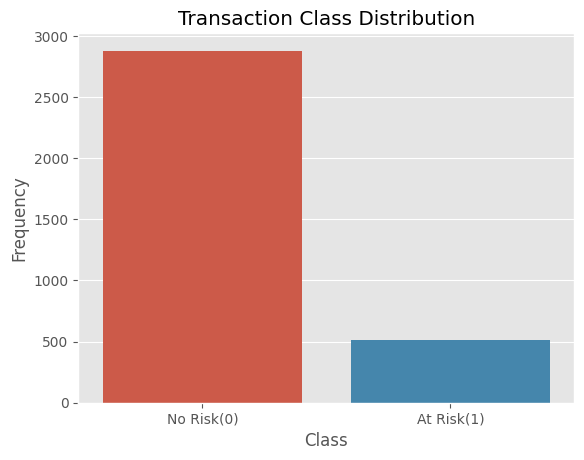

In [66]:
# Handling Imbalanced Dataset (If needed)
print(final_df['TenYearCHD'].value_counts())
print(f"Percentage of majority(0) and minority class(1): {final_df['TenYearCHD'].value_counts(normalize=True)[0]*100:.2f} % and {final_df['TenYearCHD'].value_counts(normalize=True)[1]*100:.2f} %")

# Visualizing the imbalanced class
sns.countplot(x='TenYearCHD', data=final_df)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), ['No Risk(0)', 'At Risk(1)'])
plt.xlabel("Class")
plt.ylabel("Frequency")

In [67]:
# Importing SMOTE for balancing the dataset
from imblearn.over_sampling import SMOTE

# Fitting the data
smote = SMOTE(sampling_strategy='minority', random_state=0)
x_sm, y_sm = smote.fit_resample(x, y)

# Checking Value counts for both classes Before and After handling Class Imbalance:
for col,label in [[y,"Before"],[y_sm,'After']]:
  print(label+' Handling Class Imbalace:')
  print(col.value_counts(),'\n')

Before Handling Class Imbalace:
TenYearCHD
0             2879
1              511
dtype: int64 

After Handling Class Imbalace:
TenYearCHD
0             2879
1             2879
dtype: int64 



In [68]:
# Respliting the dataset after using SMOTE
x_smote_train, x_smote_test, y_smote_train, y_smote_test = train_test_split(x_sm,y_sm , test_size = 0.2, random_state = 0) 
     

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

- The dataset is imbalanced, with the majority class being "No Risk" and minority class being "At Risk".
- Imbalanced dataset may cause the model to be biased towards the majority class, leading to poor performance in predicting the minority class.
- The objective of the model is to predict the risk of CHD for patients, even if there is a remote possibility.
- To achieve this, we need a model that can detect the risk of CHD in patients even if it is low, which requires taking more risks for the "At Risk" class.
- While traditional techniques like oversampling the minority class can improve accuracy, it may not be the best solution in the real-world scenario because it can lead to frequent misclassification of "At Risk" patients.
- Therefore, we are using SMOTETomek on the training set to address the class imbalance by generating synthetic samples from the minority class that are close in feature space to existing samples.

### 8. Data Scaling

In [69]:
## Scaling your data
# Importing StandardScaler for Data Scaling
from sklearn.preprocessing import StandardScaler

# Creating object
std_scaler= StandardScaler()

# Fit and Transform
x_smote_train= std_scaler.fit_transform(x_smote_train)
x_smote_test= std_scaler.transform(x_smote_test)

##### Which method have you used to scale you data and why?

I have used StandardScaler of sklearn library to scale our data. This is important for us, as features on different scales can lead to poor performance or slow convergence. Standardizing the features also makes it easier to compare different features or observe the effect of a feature on the target variable by comparing the magnitude of its coefficient.

## ***7. ML Model Implementation***

In [70]:
# Defining a function to train the input model and print evaluation matrics such as classification report, confusion matrix and AUC-ROC curve in visualize format
def analyse_model(model, x_train, x_test, y_train, y_test):

  '''Takes classifier model, train-set and test-set as input and prints the evaluation matrices in visualize format and returns the model'''

  # Fitting the model
  model.fit(x_train,y_train)

  # Finding best parameters
  try:
    print(f"The best parameters are: {model.best_params_}")
  except:
    pass

  # Plotting Evaluation Metrics for train and test dataset
  for x, act, label in ((x_train, y_train, 'Train-Set'),(x_test, y_test, "Test-Set")):

    # Getting required metrics
    pred = model.predict(x)
    pred_proba = model.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=act, output_dict=True))
    fpr, tpr, thresholds = roc_curve(act, pred_proba)
# Classification report
    plt.figure(figsize=(18,3))
    plt.subplot(1,3,1)
    sns.heatmap(report.iloc[:-1, :-2].T, annot=True, cmap=sns.color_palette("crest", as_cmap=True),fmt=".2f",annot_kws={"fontsize":14, "fontweight":"bold"},linewidths=1.0)
    plt.title(f'{label} Classification Report')

    # Confusion Matrix
    plt.subplot(1,3,2)
    matrix= confusion_matrix(y_true=act, y_pred=pred)
    sns.heatmap(matrix, annot=True, cmap=sns.color_palette("flare", as_cmap=True),fmt=".2f", annot_kws={"fontsize":14, "fontweight":"bold"},linewidths=1.0)
    plt.title(f'{label} Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')
    
    # AUC_ROC Curve
    plt.subplot(1,3,3)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
    plt.legend(loc=4)
    plt.title(f'{label} AUC_ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()

  plt.show()

  return model
     

### ML Model - 1 Logistic Regression

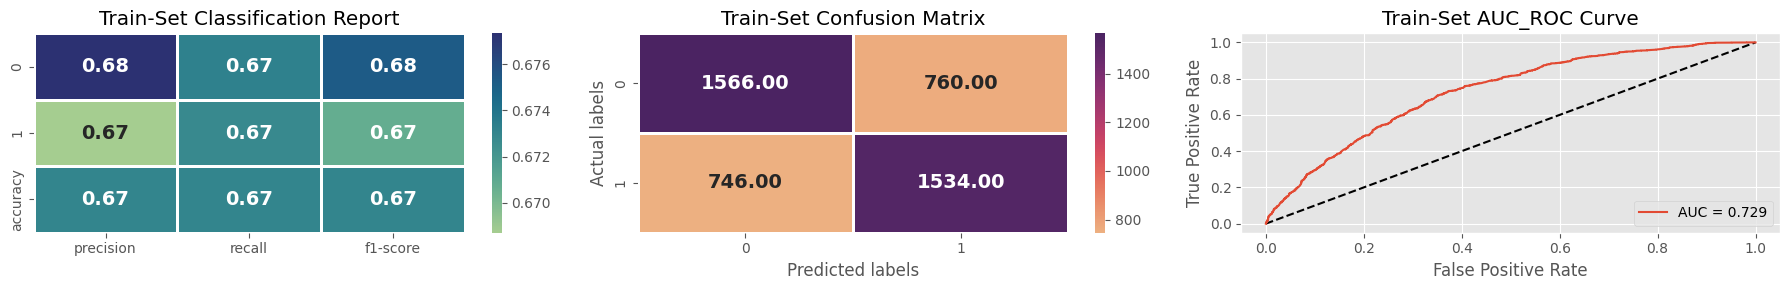

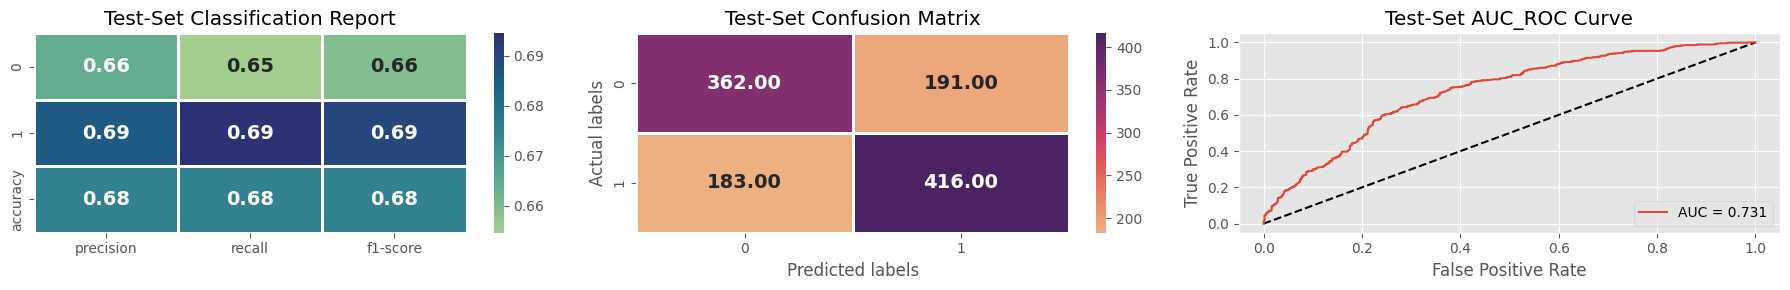

LogisticRegression(max_iter=10000)

In [71]:
# Fitting Logistic Regression Model and Visualizing evaluation Metric Score chart
lr = LogisticRegression(fit_intercept=True, max_iter=10000)
analyse_model(lr, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

- Logistic Regression is the least complex model used for binary classification
- Recall is given more emphasis in the analysis to minimize FN values (153 in our case)
- Achieved a recall of 0.67 on the train set and 0.69 on the test set
- AUC-ROC score of 72% and accuracy of 73% were obtained
- Out of 1152 patients in the test dataset, 832 were correctly predicted while 320 were wrongly predicted
- Need to minimize the wrongly predicted patients, especially those with higher chances of infection
- Other models were implemented and compared to push the limits and save more patients.

### ML Model - 2 Naive Bayes

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

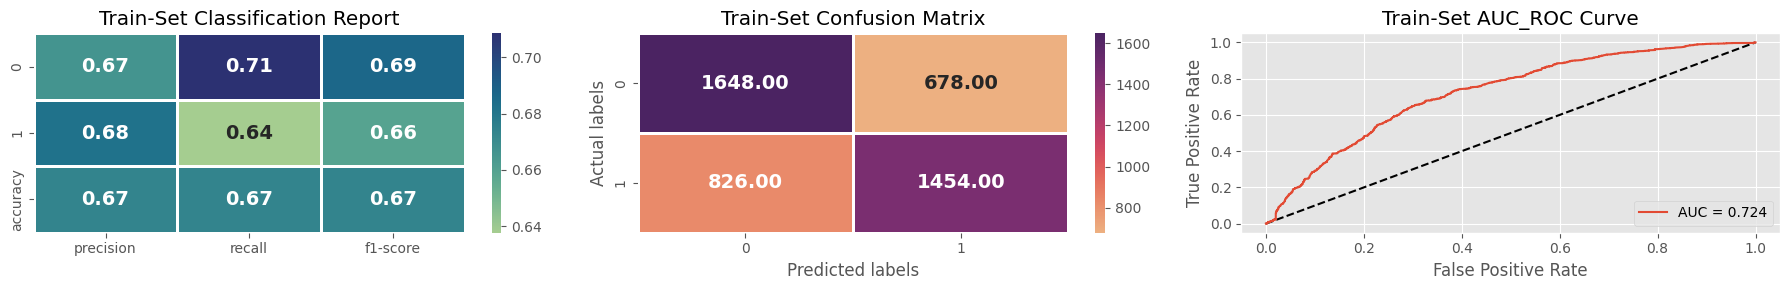

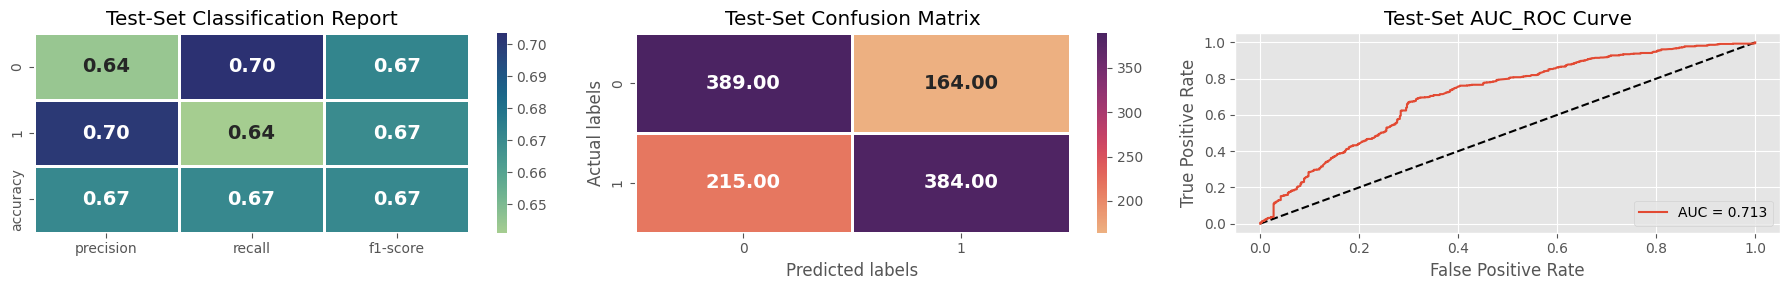

GaussianNB()

In [72]:
# Fitting Naive Bayes Classifier
nbc = GaussianNB()
analyse_model(nbc, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

Naive bayes is not giving much good results as per expected. Although the auc-roc score is 0.71 which is pretty good but there are 215 FN cases(Risky) which are resulting the less recall i.e 0.64 for the minority class and this is not good for healthcare data.

### ML Model - 3 RandomForest

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

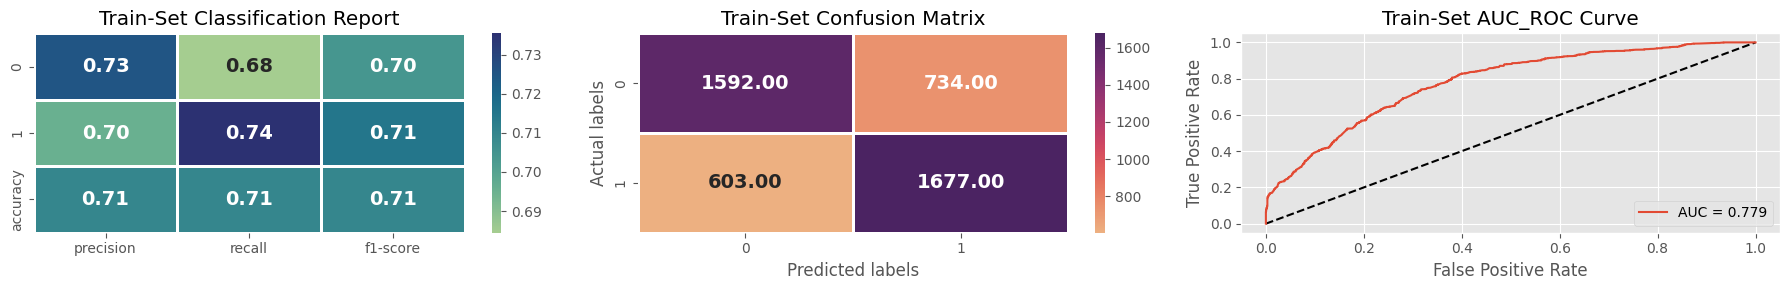

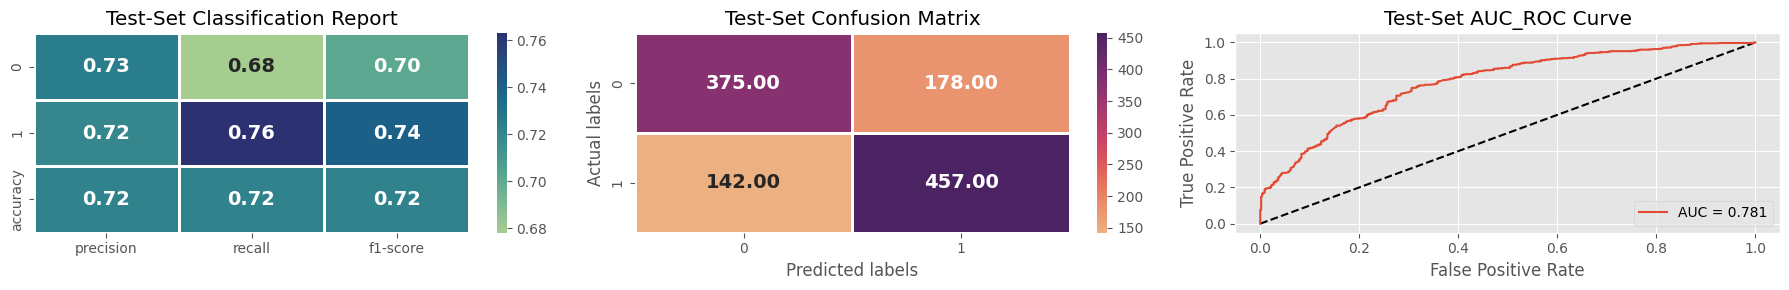

RandomForestClassifier(max_depth=3, n_estimators=500, n_jobs=-1, random_state=0)

In [73]:
# Importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Fitting RandomForestClassifier Model
RF_classifier = RandomForestClassifier(n_estimators=500,max_depth=3,n_jobs=-1,random_state=0)

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_model(RF_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

We have the options to use Decision tree as our base model but to get the significantly good results we have used the ensemble technique of Decision tree i.e Random forest that has the capability of minimizing the error by taking different trees with different subsets.

In logistic regression we have got the recall of 0.69 for class 1 in test dataset but after implimenting random forest we got the recall of 0.76 and the auc-roc increased from 72% to 778% this means that our model is actually bifurcating the either of the two categories of the target variable.

We have also observed the f1-score of 0.70 for class 0 and 0.74 for class 1 in test set that means we are actually maintaining the trade between the precision and recall.

#### 2. Cross- Validation & Hyperparameter Tuning

The best parameters are: {'max_depth': 10, 'n_estimators': 150}


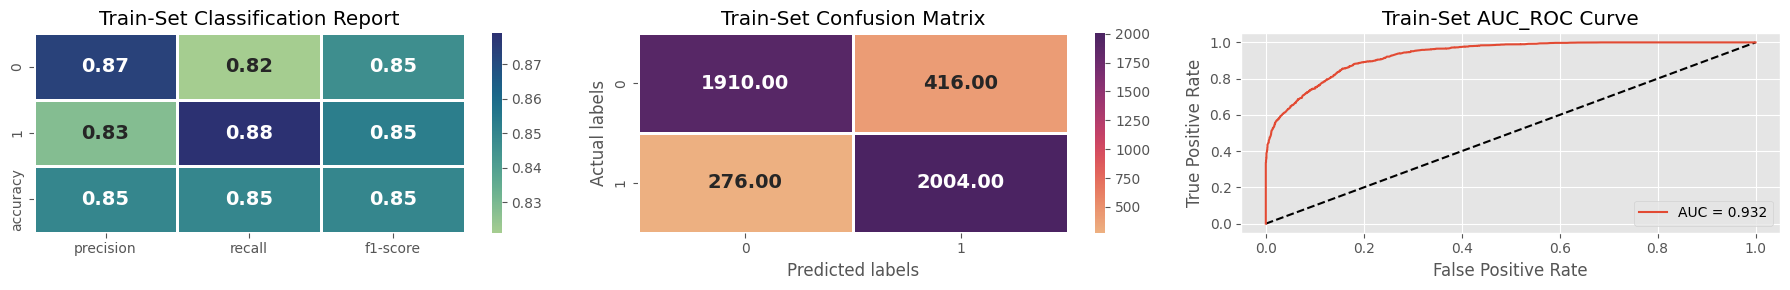

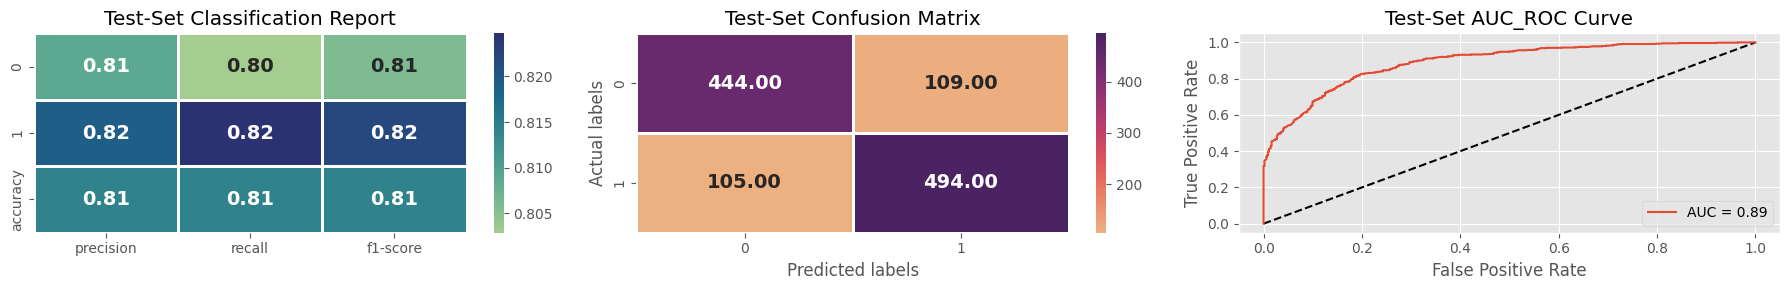

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [7, 8, 10],
                         'n_estimators': [150, 250, 300, 350]},
             scoring='roc_auc')

In [74]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

# Defining classifier instance
classifier= RandomForestClassifier(random_state=0)

# Defining parameters
grid_values = {'n_estimators':[150,250,300,350], 'max_depth':[7,8,10]}

# Fitting RandomForestClassifier Model with GridSearchCV
RF_grid_classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Analysing the model
analyse_model(RF_grid_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV as the method for hyperparameter optimization. GridSearchCV is a well-known technique that explores all possible combinations of hyperparameters to determine the best values. This approach provides a more precise and accurate tuning of the hyperparameters. It assesses the performance of each combination and selects the best set of values for the hyperparameters, leading to optimal model performance.

### ML - 4  XGBoost

1. Explain the ML Model and it's performance using Evaluation metric Score Chart.

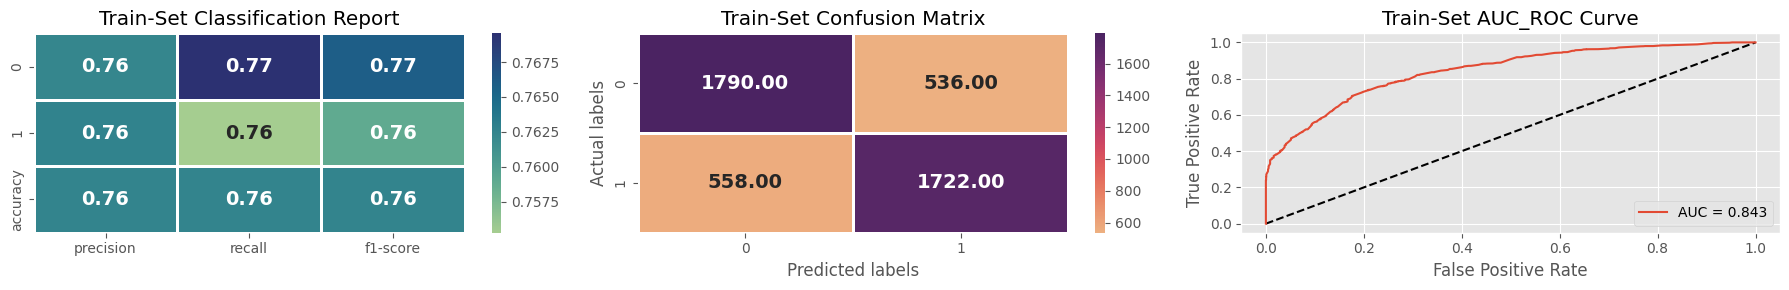

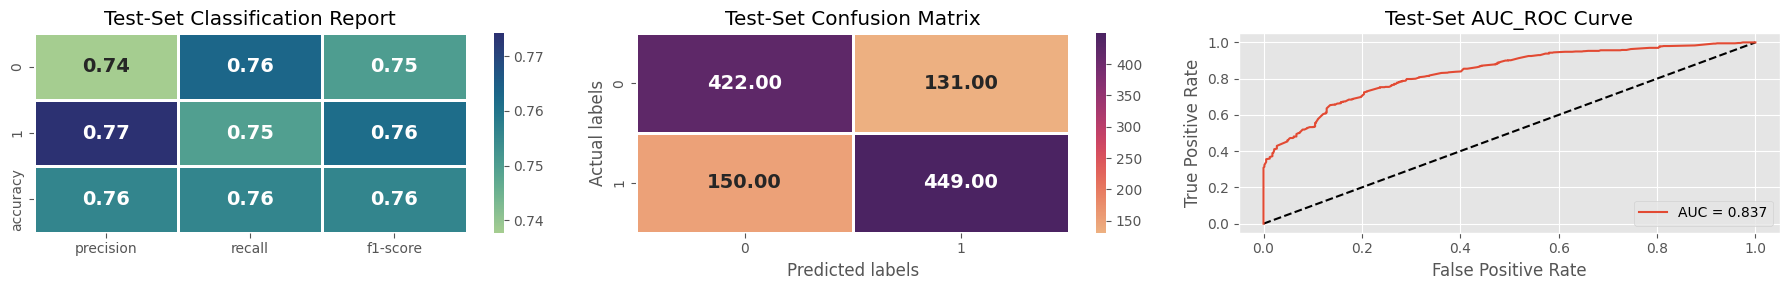

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [75]:
# Importing RandomForestClassifier
from xgboost import XGBClassifier

# Fitting XGBClassifier Model
XGB_classifier = XGBClassifier(n_estimators=150,max_depth=1,n_jobs=-1,random_state=0)

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_model(XGB_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)
     

2. Cross- Validation & Hyperparameter Tuning

The best parameters are: {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 250}


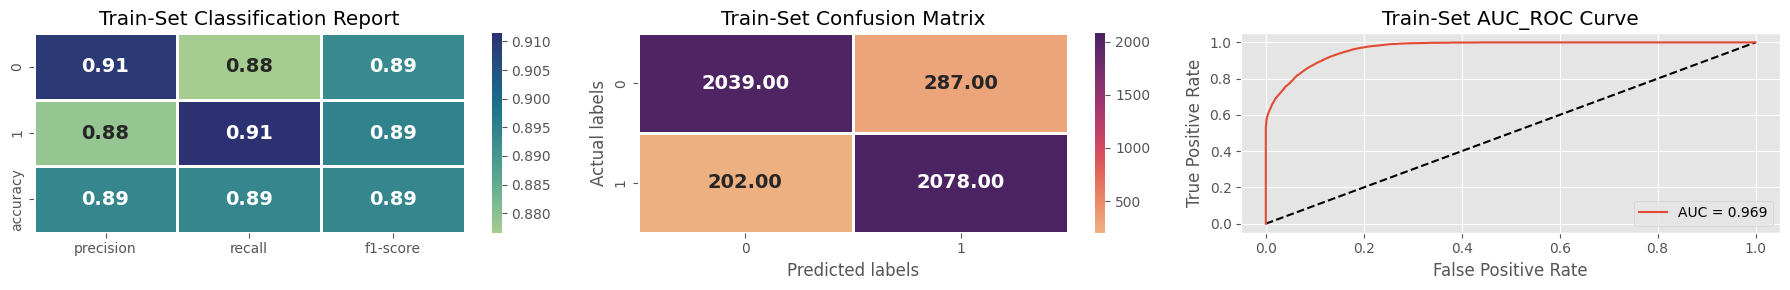

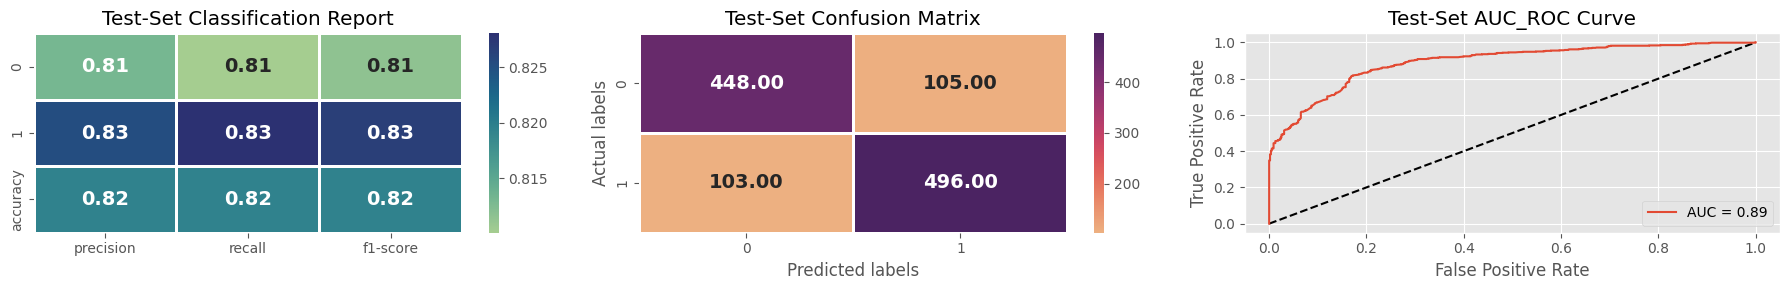

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [250, 300, 350]},
             scoring='roc_auc')

In [76]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

# Defining classifier instance
classifier= XGBClassifier(random_state=0)

# Defining parameters
grid_values = {'learning_rate':[0.01, 0.1,1],'n_estimators':[250,300,350], 'max_depth':[2,3,4,5]}

# Fitting RandomForestClassifier Model with GridSearchCV
XGB_grid_classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=3)

# Analysing the model
analyse_model(XGB_grid_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

Which hyperparameter optimization technique have you used and why?

GridSearchCV has been used for hyperparameter tuning. We perform hyperparameter tuning to maximize models predictive accuracy. In gridsearchCV approach, the machine learning model for a range of hyperparameter values. It searches for the best set of hyperparameter values from a grid of hyperparameter values.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Achieved highest recall, precison, accuracy and F-1 score till now after tuning the hyperparameters of XGboost. Is is very clear from the confusion matrix that only 103 partients are wrongly 0(FN) predicted and 105 are wrongly 1(FP) predicted and this becomes the reason of highest precision and recall till now(since both Recall and FN are inversely proportional and vice-versa for Precision and FP).

On the other hand the F1 Score of the manjority and minority class are 83% and 81% that means we equally maximiziing the precision and recall since F1 score is the harmonic mean of precision and recall and able to maintaining the trade-off between them.

The AUC-ROC curve we are obtaining has covered 89% of the area and that means our model is accurately distinguishing between the negative and the positive classes and for tese results the best paramters are found out to be 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 350

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In order to minimise the errors between actual and predicted values, we evaluate our ML model using different metrics such as Recall, F-1 score, Accuracy and AUC-ROC. All these metrics try to give us an indication on how close we are with the real/expected output. In our case, each evaluation metric is showing not much difference on the train and test data which shows that our model is predicting a closer expected value.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

In [77]:
# Storing different regression metrics in order to make dataframe and compare them
models = ["Logistic_regression","Naive_bayes","Random_forest","XGboost",]
Precision = [0.69,0.70,0.82,0.83] 
Recall = [0.69,0.64,0.82,0.83]
F1_Score= [0.69,0.67,0.82,0.83]
Accuracy = [0.68,0.67,0.81,0.82]
AUCROC = [0.73,0.71,0.89,0.89]

# Create dataframe from the lists
data = {'Models': models, 
        'Precision': Precision,
        'Recall': Recall,
        'F1_Score': F1_Score,
        'Accuracy': Accuracy,
        'AUCROC': AUCROC,
       }
metric_df = pd.DataFrame(data)

# Printing dataframe
metric_df
     

Models  Precision  Recall  F1_Score  Accuracy  AUCROC
0  Logistic_regression       0.69    0.69      0.69      0.68    0.73
1          Naive_bayes       0.70    0.64      0.67      0.67    0.71
2        Random_forest       0.82    0.82      0.82      0.81    0.89
3              XGboost       0.83    0.83      0.83      0.82    0.89

Among all the 4 model we have trained so far, the highest recall, F-1 score and accuracy we are getting with XGboost. So , we are considering XGboost as our final optimal model and can give predictions on the unseen data with 82% of accuracy and can be used for deployment purpose.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

- XGBoost is a gradient boosting framework designed for both linear and tree-based models.
- It trains a sequence of simple models, such as decision trees, and combines their predictions to create a more powerful model.
- Each tree is trained to correct the errors made by the previous trees in the sequence.
- XGBoost uses gradient boosting to optimize the parameters of the trees by minimizing the loss function.
- It includes features such as regularization to prevent overfitting and parallel processing to allow for faster training times.
- Tree-based algorithms like XGBoost can provide accurate results, but they may have low explainability.
- Explanability tools like LIME and SHAP can be used to explain the model to stakeholders.

# **Conclusion**

**Conclusions drawn from EDA**

* In the dataset, 56.7% of individuals are female and rest are male and males are more prone to CHD as compared to females.

* 50.24% of the individual present in the dataset are into smoking and residents who are consuming more cigarettes are at a risk of getting suffered with Heart Diseases.

* Only 2.9% people are taking BP Medicines and BP patients are having high chances of CHD.

* 0.6% and 31.5 % people have a history of strokes and hypertension respectively.

* 2.6% people have diabetes who are more prone to CHD.

* 15.1% people have a chance of getting heart diseases in ten years.

 
* In the dataset most of the population have Education Level - 1 with 42.1% and least education level 4 with 11.3% .

* With increasing age, chances of having cardiovascular disease increases. People above 65 years (i.e. old people) are more vulnerable to Heart Diseases.
sysBP and diaBP are positively correlated with each other.

* Patients who are having stroke or hypertention history, diabetes are more prone to CHD.

* There are more males consuming cigarattes as compared to females.
**Higher glucose level** lead to **heart diseases** resulting **higher chances** of **diabetic patients to cardiovascular disease**.

**Conclusions drawn from ML Model**

* Implemented 4 classification ML Models Logistic Regression, Random forest, XGboost, Naive Bayes in our analysis.

* Considered XGboost as our final optimal model as we are getting highest recall, precision, f1 score, accuracy and auc-roc from it.

* Out of 1152 patients our optimal model is correcly predicting 520 of class 0 and 510 of class 1 patients, other 89 and 33 are FN and FP cases.

* Age, sex and pulse pressure are the** highest contributing features** towards the predictions.

* Best parameters of XGboost found out to be learning_rate: 0.1, max_depth: 5 and n_estimators: 350.

* No overtfitting has been observed in any of the model.

### ***Hurrah!  Successfully completed your Machine Learning Capstone Project !!!***